<a href="https://colab.research.google.com/github/NAndrei313/marketing-analytics-portfolio/blob/main/11_Marketing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%pip install --upgrade plotly

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
!head -n 5 data.csv

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0


In [ ]:
df_data = pd.read_csv('data.csv')

In [ ]:
df_data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2045,10897,1974,Graduation,Married,67445,0,1,12-08-2012,63,757,...,6,0,0,0,0,0,0,3,11,0
1120,2975,1976,Graduation,Together,85606,0,1,12-11-2012,89,717,...,3,0,0,0,1,0,0,3,11,0
464,5512,1977,Master,Married,55842,0,1,23-05-2014,19,451,...,5,0,0,0,0,0,0,3,11,0
1670,2570,1968,Graduation,Together,56534,0,1,23-07-2013,35,691,...,8,0,1,0,0,1,0,3,11,1
1533,2544,1951,Master,Divorced,57530,0,1,12-10-2013,68,50,...,1,0,0,0,0,0,0,3,11,0


In [ ]:
# Dataset size
df_data.shape

(2216, 29)

In [ ]:
# Data types
df_data.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,int64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
# General data information (missing values, types)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   int64 
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

In [ ]:
# Descriptive statistics
df_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Check for missing values ​​on each column
df_data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## Data Cleaning

In [ ]:
# Convert Dt_Customer from string to proper date format:
df_data.Dt_Customer = pd.to_datetime(df_data.Dt_Customer, format='%d-%m-%Y')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
# Create "Age" column:
current_year = datetime.datetime.now().year
df_data['Age'] = current_year - df_data.Year_Birth
df_data[['Year_Birth', 'Age']].head()

,Year_Birth,Age
0,1957,68
1,1954,71
2,1965,60
3,1984,41
4,1981,44


In [ ]:
min_age = df_data['Age'].min()
print(f"The minimum age in the dataset is: {min_age}")
max_age = df_data['Age'].max()
print(f"The minimum age in the dataset is: {max_age}")

The minimum age in the dataset is: 29
The minimum age in the dataset is: 132


In [ ]:
# Create age groups by binning the 'Age' column into meaningful intervals.
bins = [26, 35, 50, 65, 100]
labels = ['26-35', '36-50', '51-65', '65+']
df_data['Age_Group'] = pd.cut(df_data['Age'], bins=bins, labels=labels, right=False)
df_data[['Year_Birth', 'Age', 'Age_Group']].head()

,Year_Birth,Age,Age_Group
0,1957,68,65+
1,1954,71,65+
2,1965,60,51-65
3,1984,41,36-50
4,1981,44,36-50


In [ ]:
min_age = df_data['Age'].min()
print(f"The minimum age in the dataset is: {min_age}")

The minimum age in the dataset is: 29


In [ ]:
df_data[df_data['Age'] <= 28]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group


In [ ]:
df_data[df_data['Age'] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group
181,7829,1900,2n Cycle,Divorced,36640,1,0,2013-09-26,99,15,...,0,0,0,0,1,3,11,0,125,NaN
228,11004,1893,2n Cycle,Single,60182,0,1,2014-05-17,23,8,...,0,0,0,0,0,3,11,0,132,NaN
326,1150,1899,PhD,Together,83532,0,0,2013-09-26,36,755,...,0,1,0,0,0,3,11,0,126,NaN


In [ ]:
df_data = df_data[df_data['Age'] <= 100]

In [ ]:
df_data[df_data['Income'] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group
2209,9432,1977,Graduation,Together,666666,1,0,2013-06-02,23,9,...,0,0,0,0,0,3,11,0,48,36-50


In [ ]:
df_data = df_data[df_data['Income'] <= 200000]

In [ ]:
# Create "Total_Children" column:
df_data['Total_Children'] = df_data.Kidhome + df_data.Teenhome
df_data[['Kidhome', 'Teenhome', 'Total_Children']].head()

,Kidhome,Teenhome,Total_Children
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1


In [ ]:
# Explore & Clean Categorical Columns:
df_data['Education'].value_counts()

,count
Education,
Graduation,1115
PhD,480
Master,365
2n Cycle,198
Basic,54


For the Education column, I decided to keep the original values provided in the dataset. These labels follow an international educational standard, and no additional grouping was required for the purpose of this analysis.

In [ ]:
df_data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,571
Single,470
Divorced,231
Widow,76
Alone,3
Absurd,2
YOLO,2


For the Marital_Status column, some minor data cleaning was necessary. We merged the category ‘Alone’ into ‘Single’, as both represent individuals without a partner. We also removed the records labeled as ‘Absurd’ and ‘YOLO’ since they represent invalid or inconsistent entries (only 4 records out of 2216), and their removal does not affect the statistical validity of the dataset.

In [ ]:
# Move 'Alone' into 'Single'
df_data['Marital_Status'] = df_data['Marital_Status'].replace('Alone', 'Single')

In [ ]:
# Drop 'Absurd' and 'YOLO'
df_data = df_data[~df_data['Marital_Status'].isin(['Absurd', 'YOLO'])]
df_data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,571
Single,473
Divorced,231
Widow,76


##Demographic Distribution Analysis
As part of the Exploratory Data Analysis (EDA), we start by examining the demographic variables of our customer base. This helps us understand who our customers are and provides valuable insights for future business decisions. Below, we explain the rationale behind analyzing each demographic variable:

###Age Distribution
Why we analyze it:
Age is a key factor that influences consumer behavior, preferences, and purchasing power. Analyzing the age distribution helps us:

Identify the dominant age groups in our customer base.

Segment customers for targeted marketing campaigns.

Detect anomalies or errors in the data (e.g. unrealistic birth years).

Prepare for further analysis where age might correlate with spending habits or campaign responses.

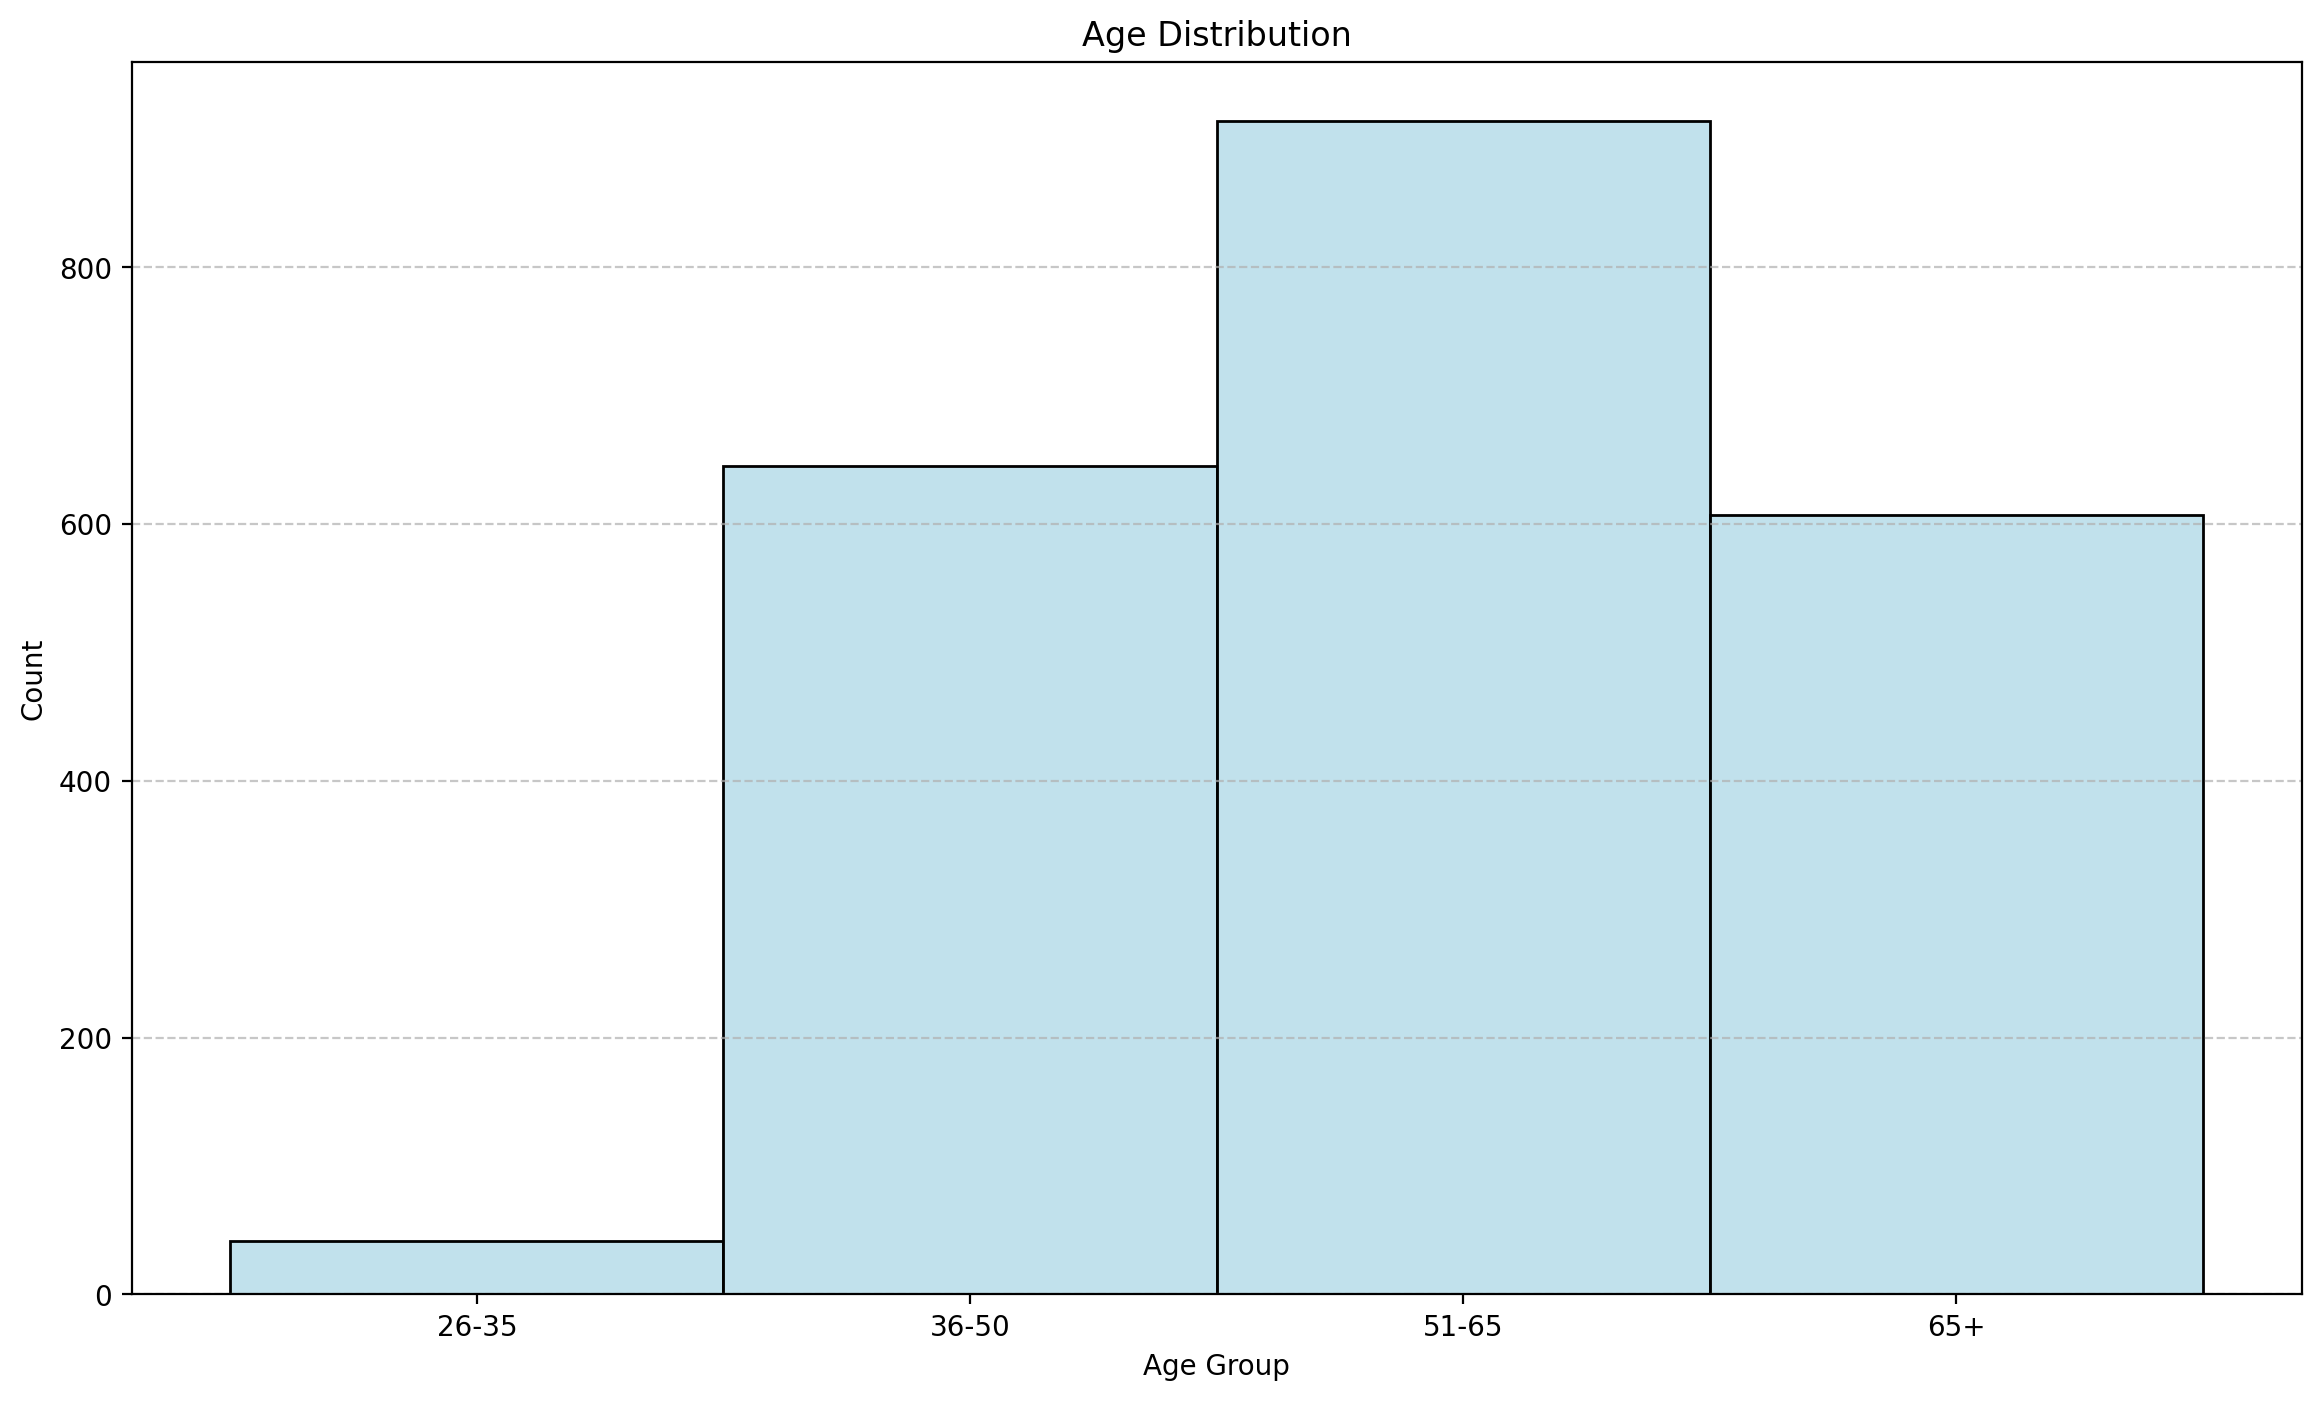

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
sns.histplot(df_data['Age_Group'], bins=6, color='lightblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Income Distribution
Why we analyze it:
Income levels have a direct impact on purchasing behavior. By analyzing income distribution, we aim to:

Understand the financial capacity of our customers.

Segment customers into different income brackets for pricing strategies.

Identify high-value customers who may respond better to premium offers.

Spot potential outliers or data entry issues.

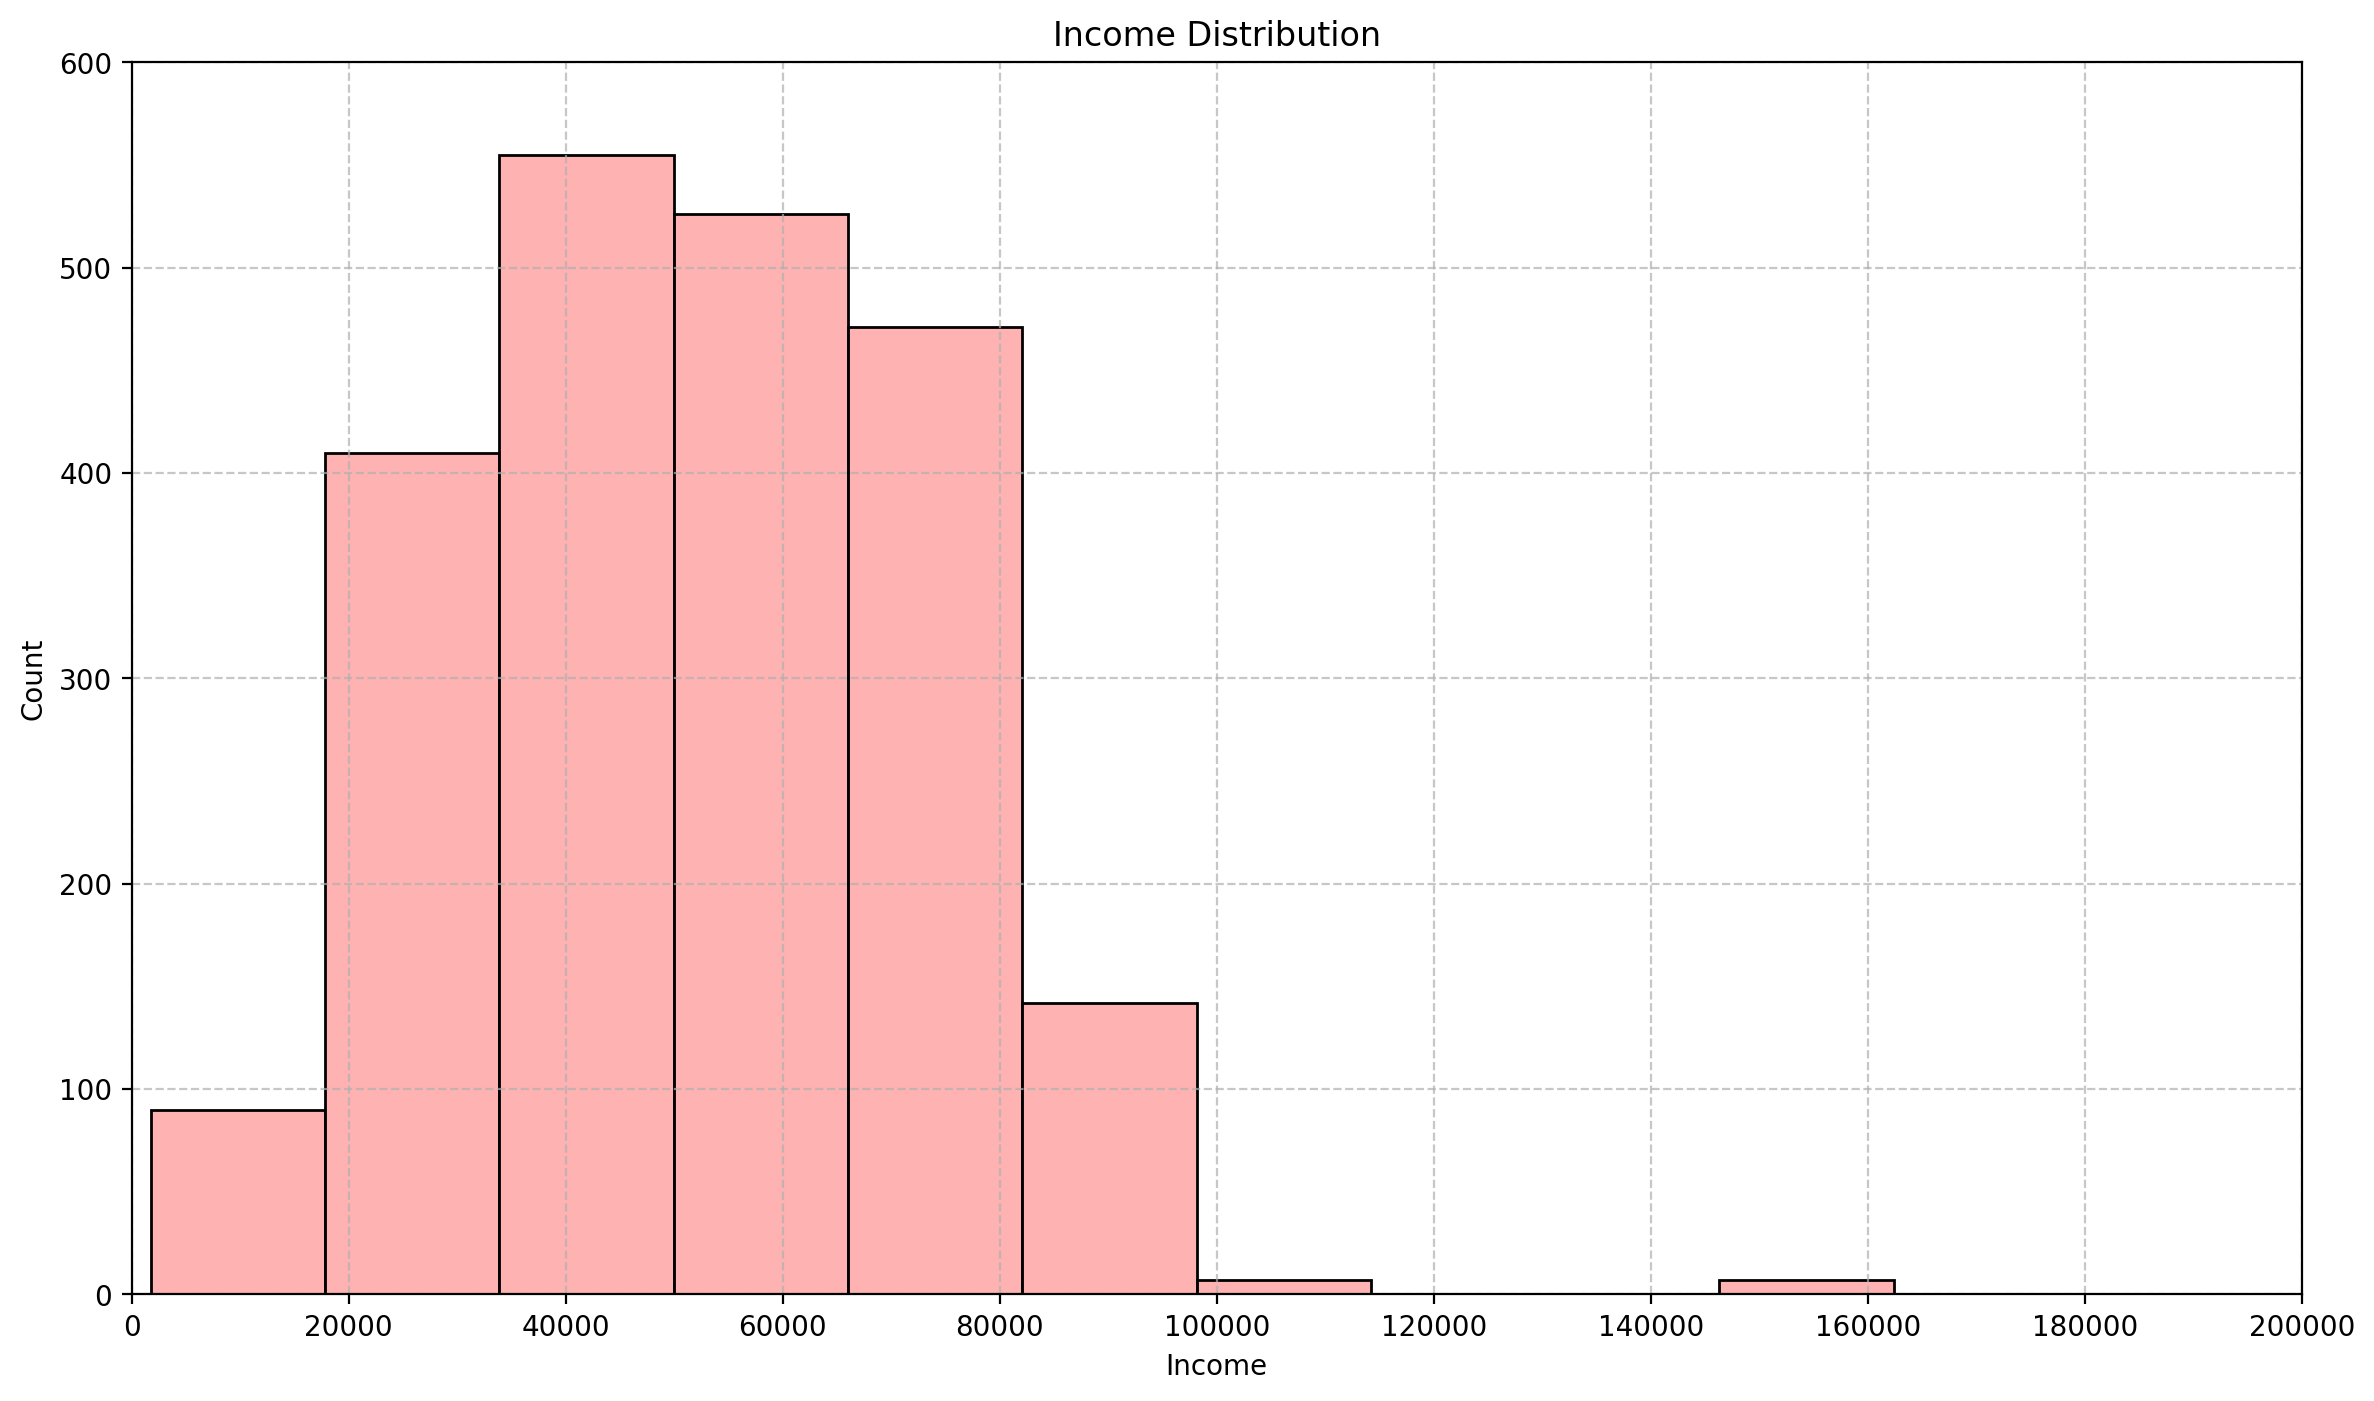

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
sns.histplot(df_data['Income'],bins=10, color='#FF9999')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xlim(0,200000)
plt.ylim(0,600)
x_tick_locations = np.arange(0, 200001, 20000)
plt.xticks(x_tick_locations)
plt.show()

#Education Distribution
Education level often correlates with lifestyle, preferences, and spending patterns. Understanding education levels helps:

Build customer personas for marketing.

Tailor communication and product offerings.

Understand the socio-economic profile of our customer base.

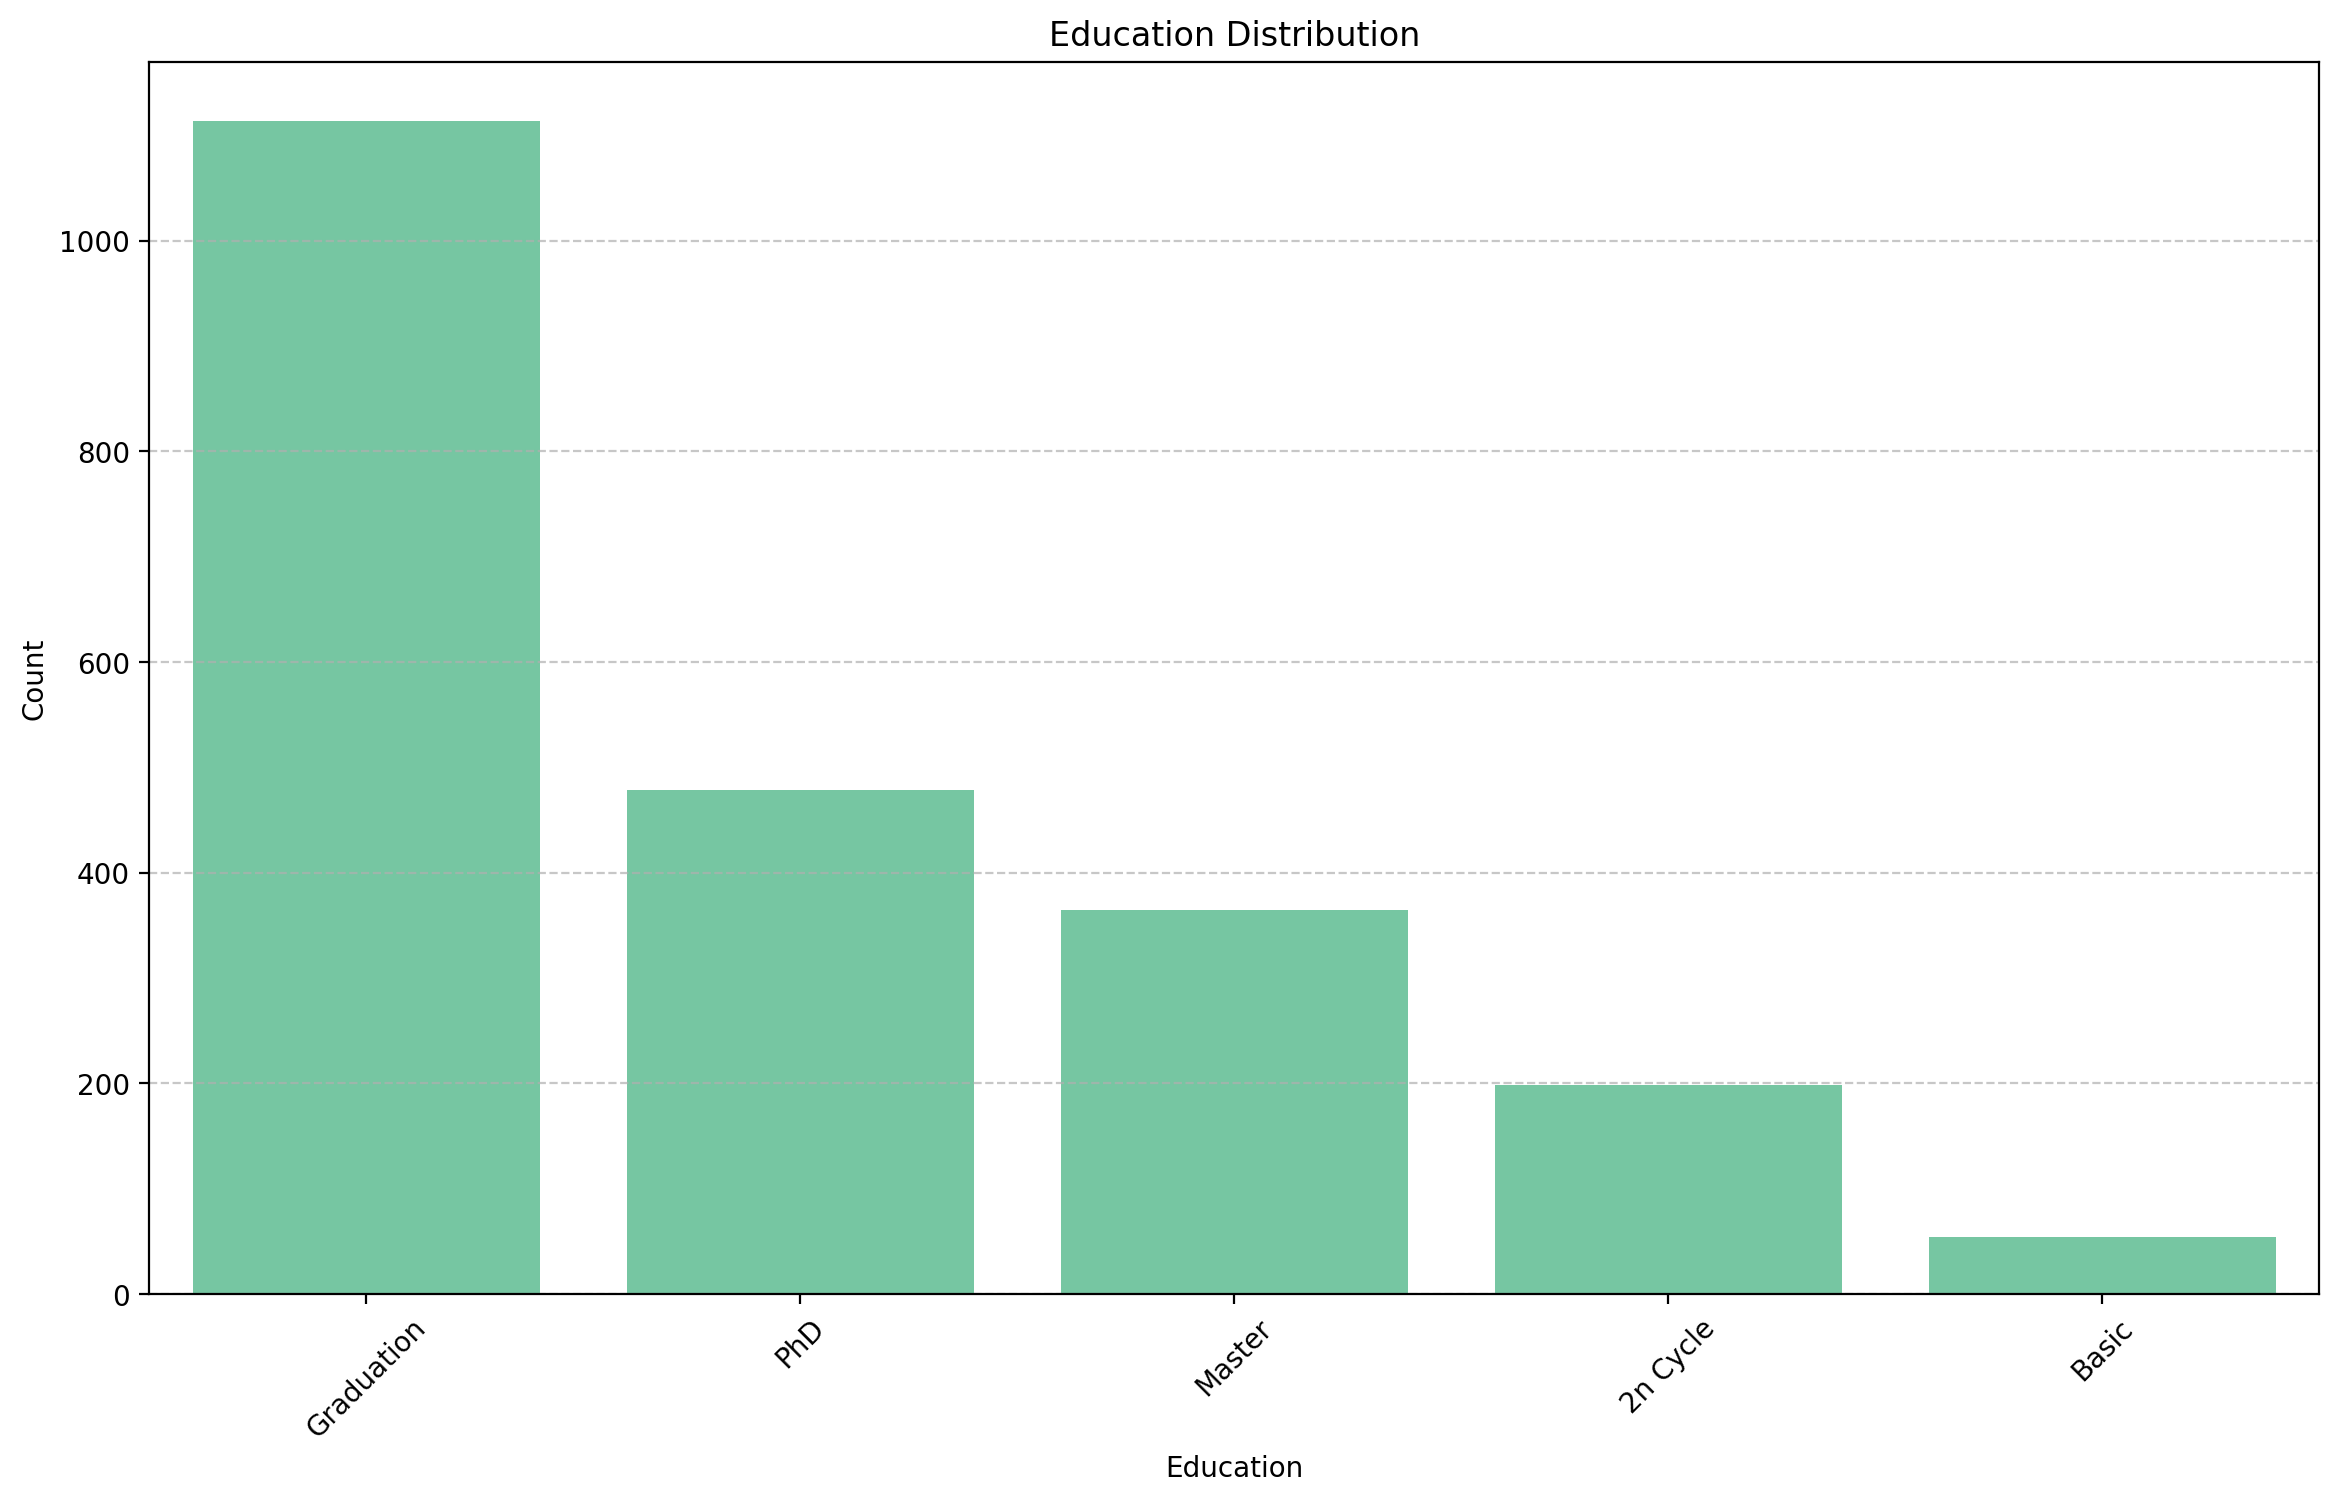

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
sns.countplot(x='Education', data=df_data, order=df_data['Education'].value_counts().index, color='#69d3a3')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

#Marital Status Distribution
Why we analyze it:
Marital status can influence household size, spending behavior, and product preferences. We grouped some categories for better clarity:

'Alone' merged into 'Single'.

'Absurd' and 'YOLO' entries removed due to being insignificant anomalies.

Understanding marital status helps:

Identify family-oriented customers.

Tailor marketing messages (e.g. family bundles vs. individual offers).

Understand household dynamics affecting purchasing decisions.

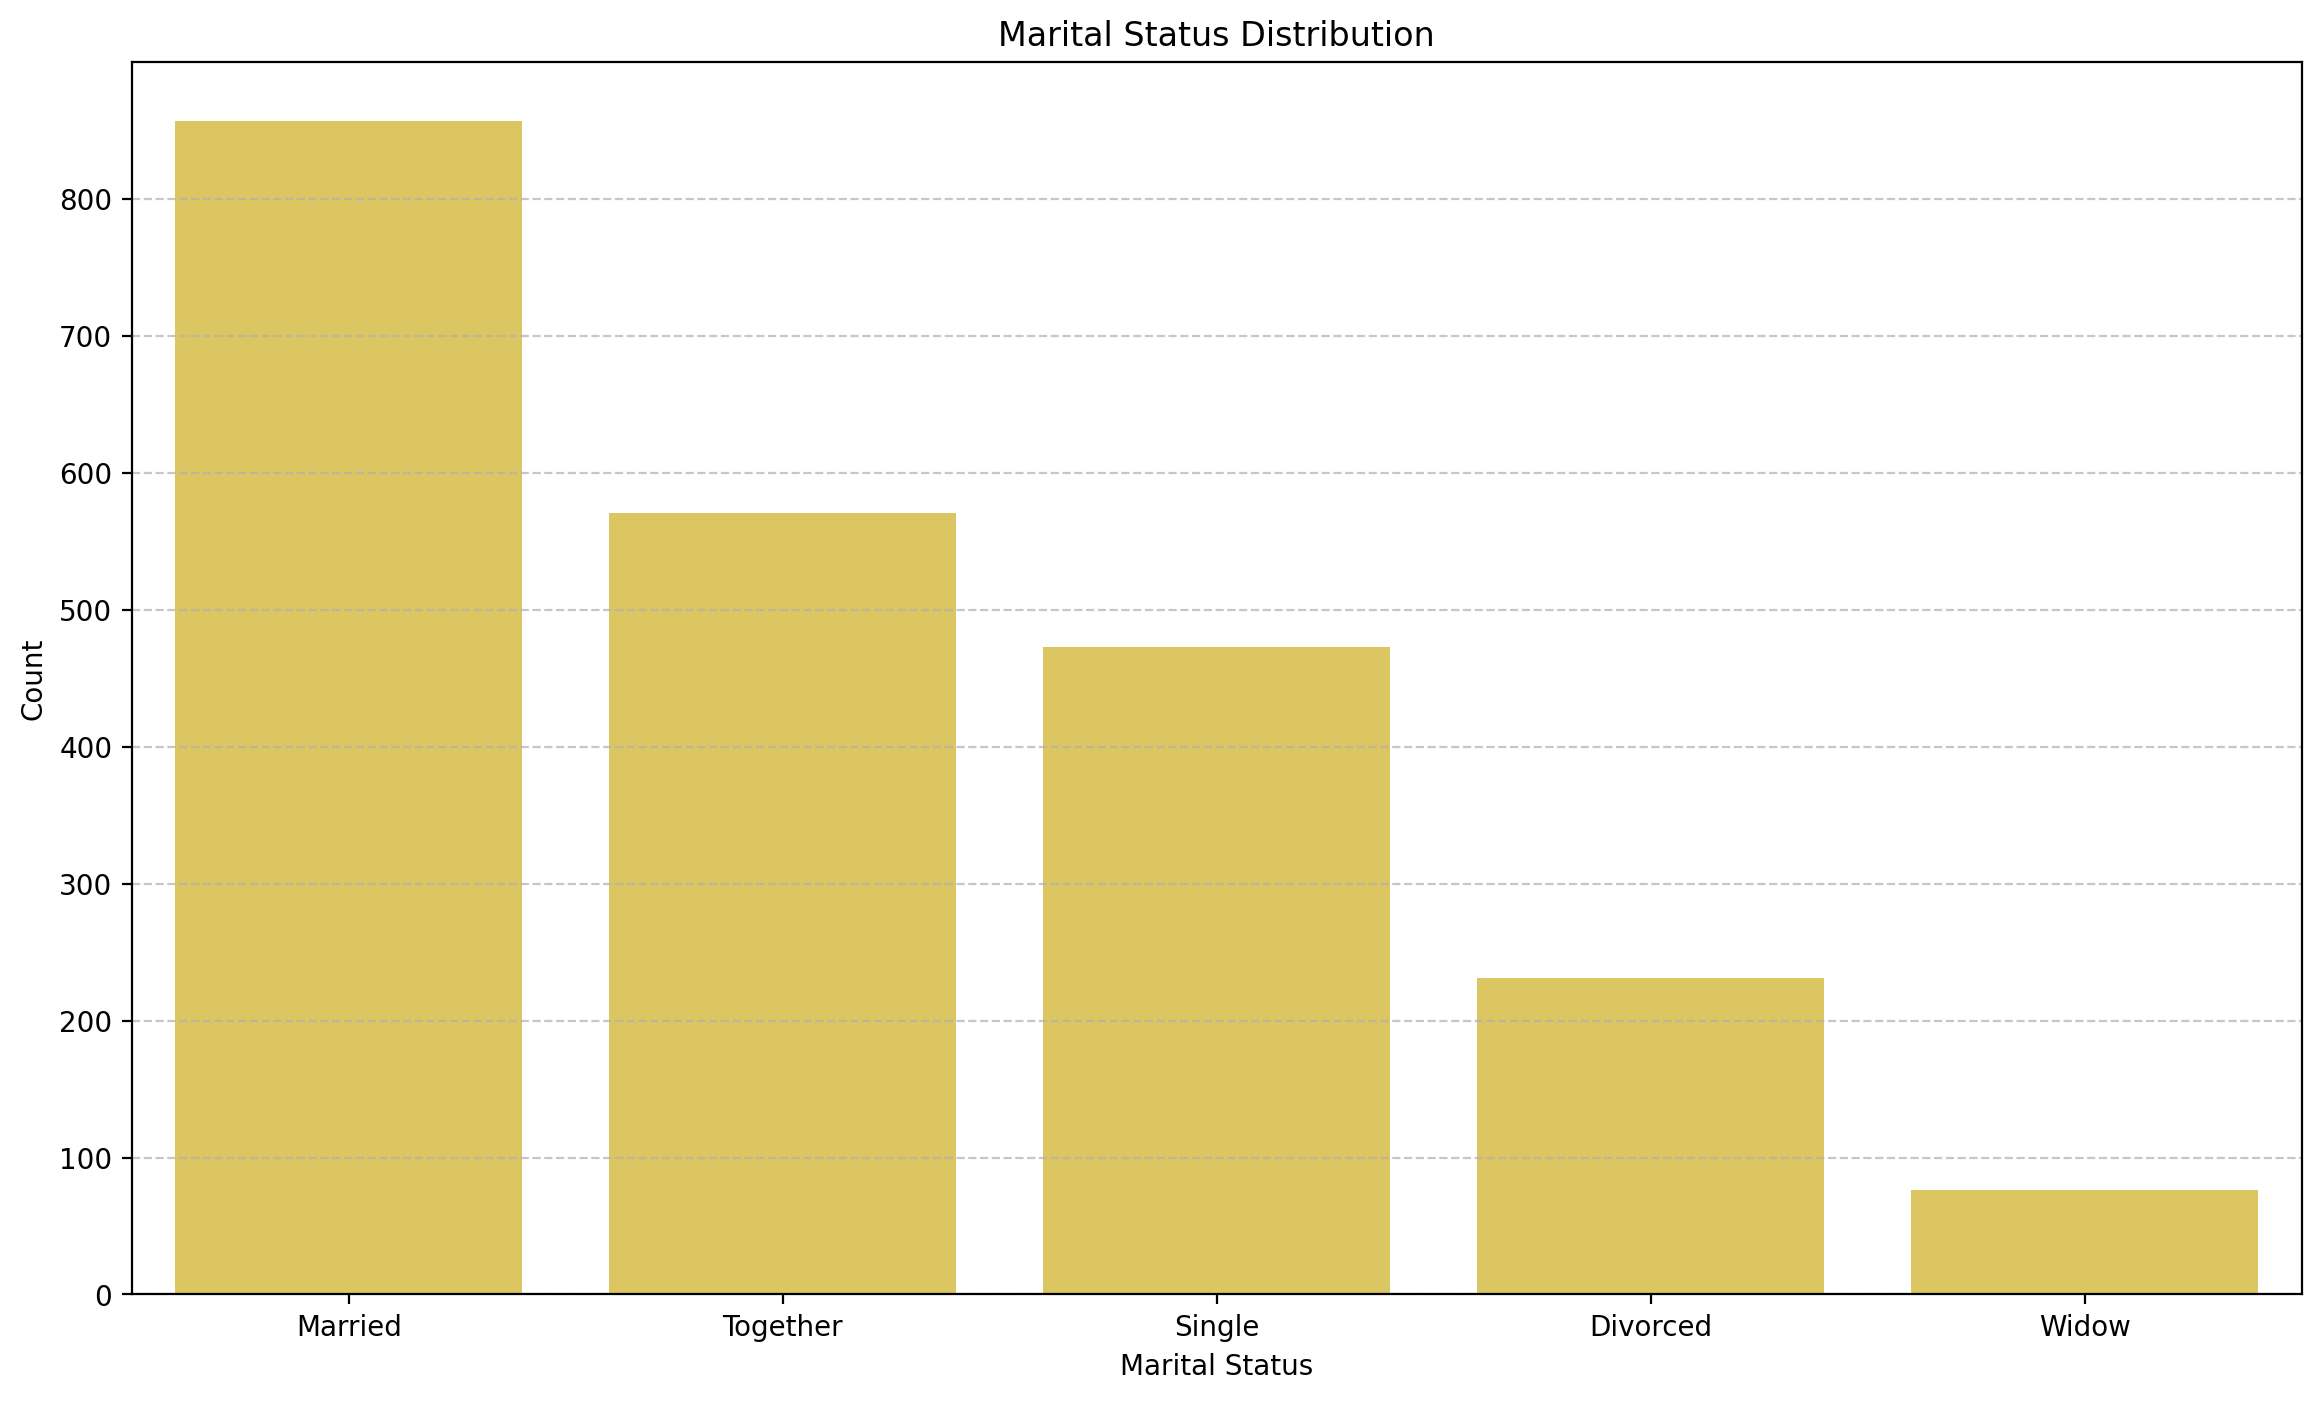

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
sns.countplot(x='Marital_Status', data=df_data, order=df_data['Marital_Status'].value_counts().index, color='#f0d34c')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Behavior distributions Analysis
##Spending Behavior by Age Group
Why we analyze this:

Analyzing spending across age groups helps identify which products are most popular among different generations. This insight is valuable for:

Targeting promotions based on age preferences

Understanding consumption patterns

Customizing product offerings for each demographic



In [ ]:
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df_data['Total_Spending'] = df_data[spending_cols].sum(axis=1)
df_data['Total_Spending']

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2211,1341
2212,444
2213,1241
2214,843


In [ ]:
# Group by Age_Group and calculate average spending
age_spending_behavior = df_data.groupby('Age_Group')[spending_cols].mean()
age_spending_behavior.head()

/tmp/ipython-input-88-236958104.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending_behavior = df_data.groupby('Age_Group')[spending_cols].mean()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age_Group,,,,,,
26-35,390.785714,38.357143,328.261905,59.119048,41.214286,62.571429
36-50,231.279070,25.556589,157.235659,35.244961,25.452713,39.986047
51-65,306.248359,25.013129,150.905908,34.296499,25.614880,42.366521
65+,376.345964,28.186161,190.466227,43.322900,29.983526,48.649094


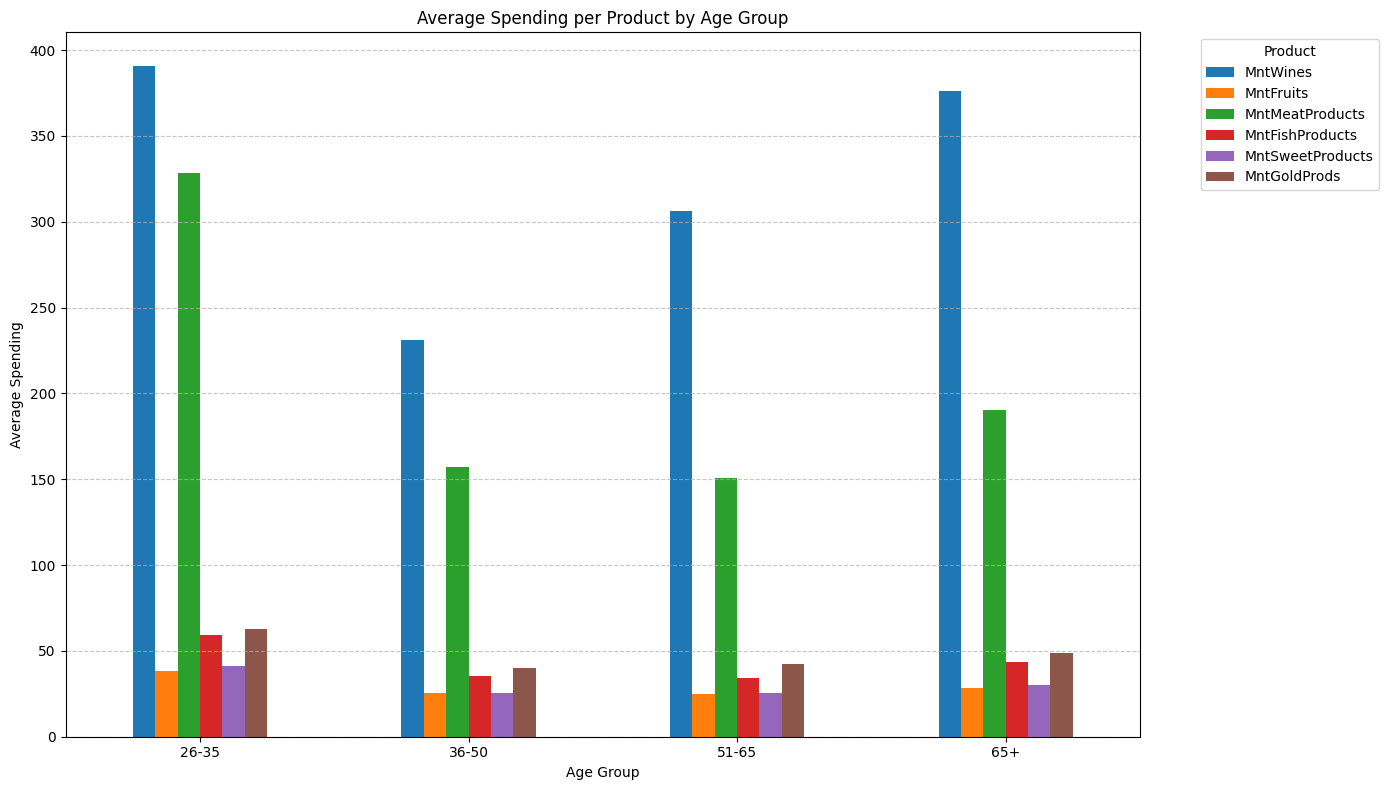

In [ ]:
# Plot a grouped bar chart
age_spending_behavior.plot(kind='bar',figsize=(14,8))
plt.title('Average Spending per Product by Age Group')
plt.ylabel('Average Spending')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Total Spending by Education
Education often correlates with income level and lifestyle preferences.

This helps identify which education groups contribute the most to overall revenue.

It can guide segmentation strategies and personalized marketing.

In [ ]:
# Group total spending by Education
education_spending = df_data.groupby('Education')['Total_Spending'].sum().sort_values(ascending=False)
education_spending

,Total_Spending
Education,
Graduation,692524
PhD,322808
Master,221396
2n Cycle,98899
Basic,4417


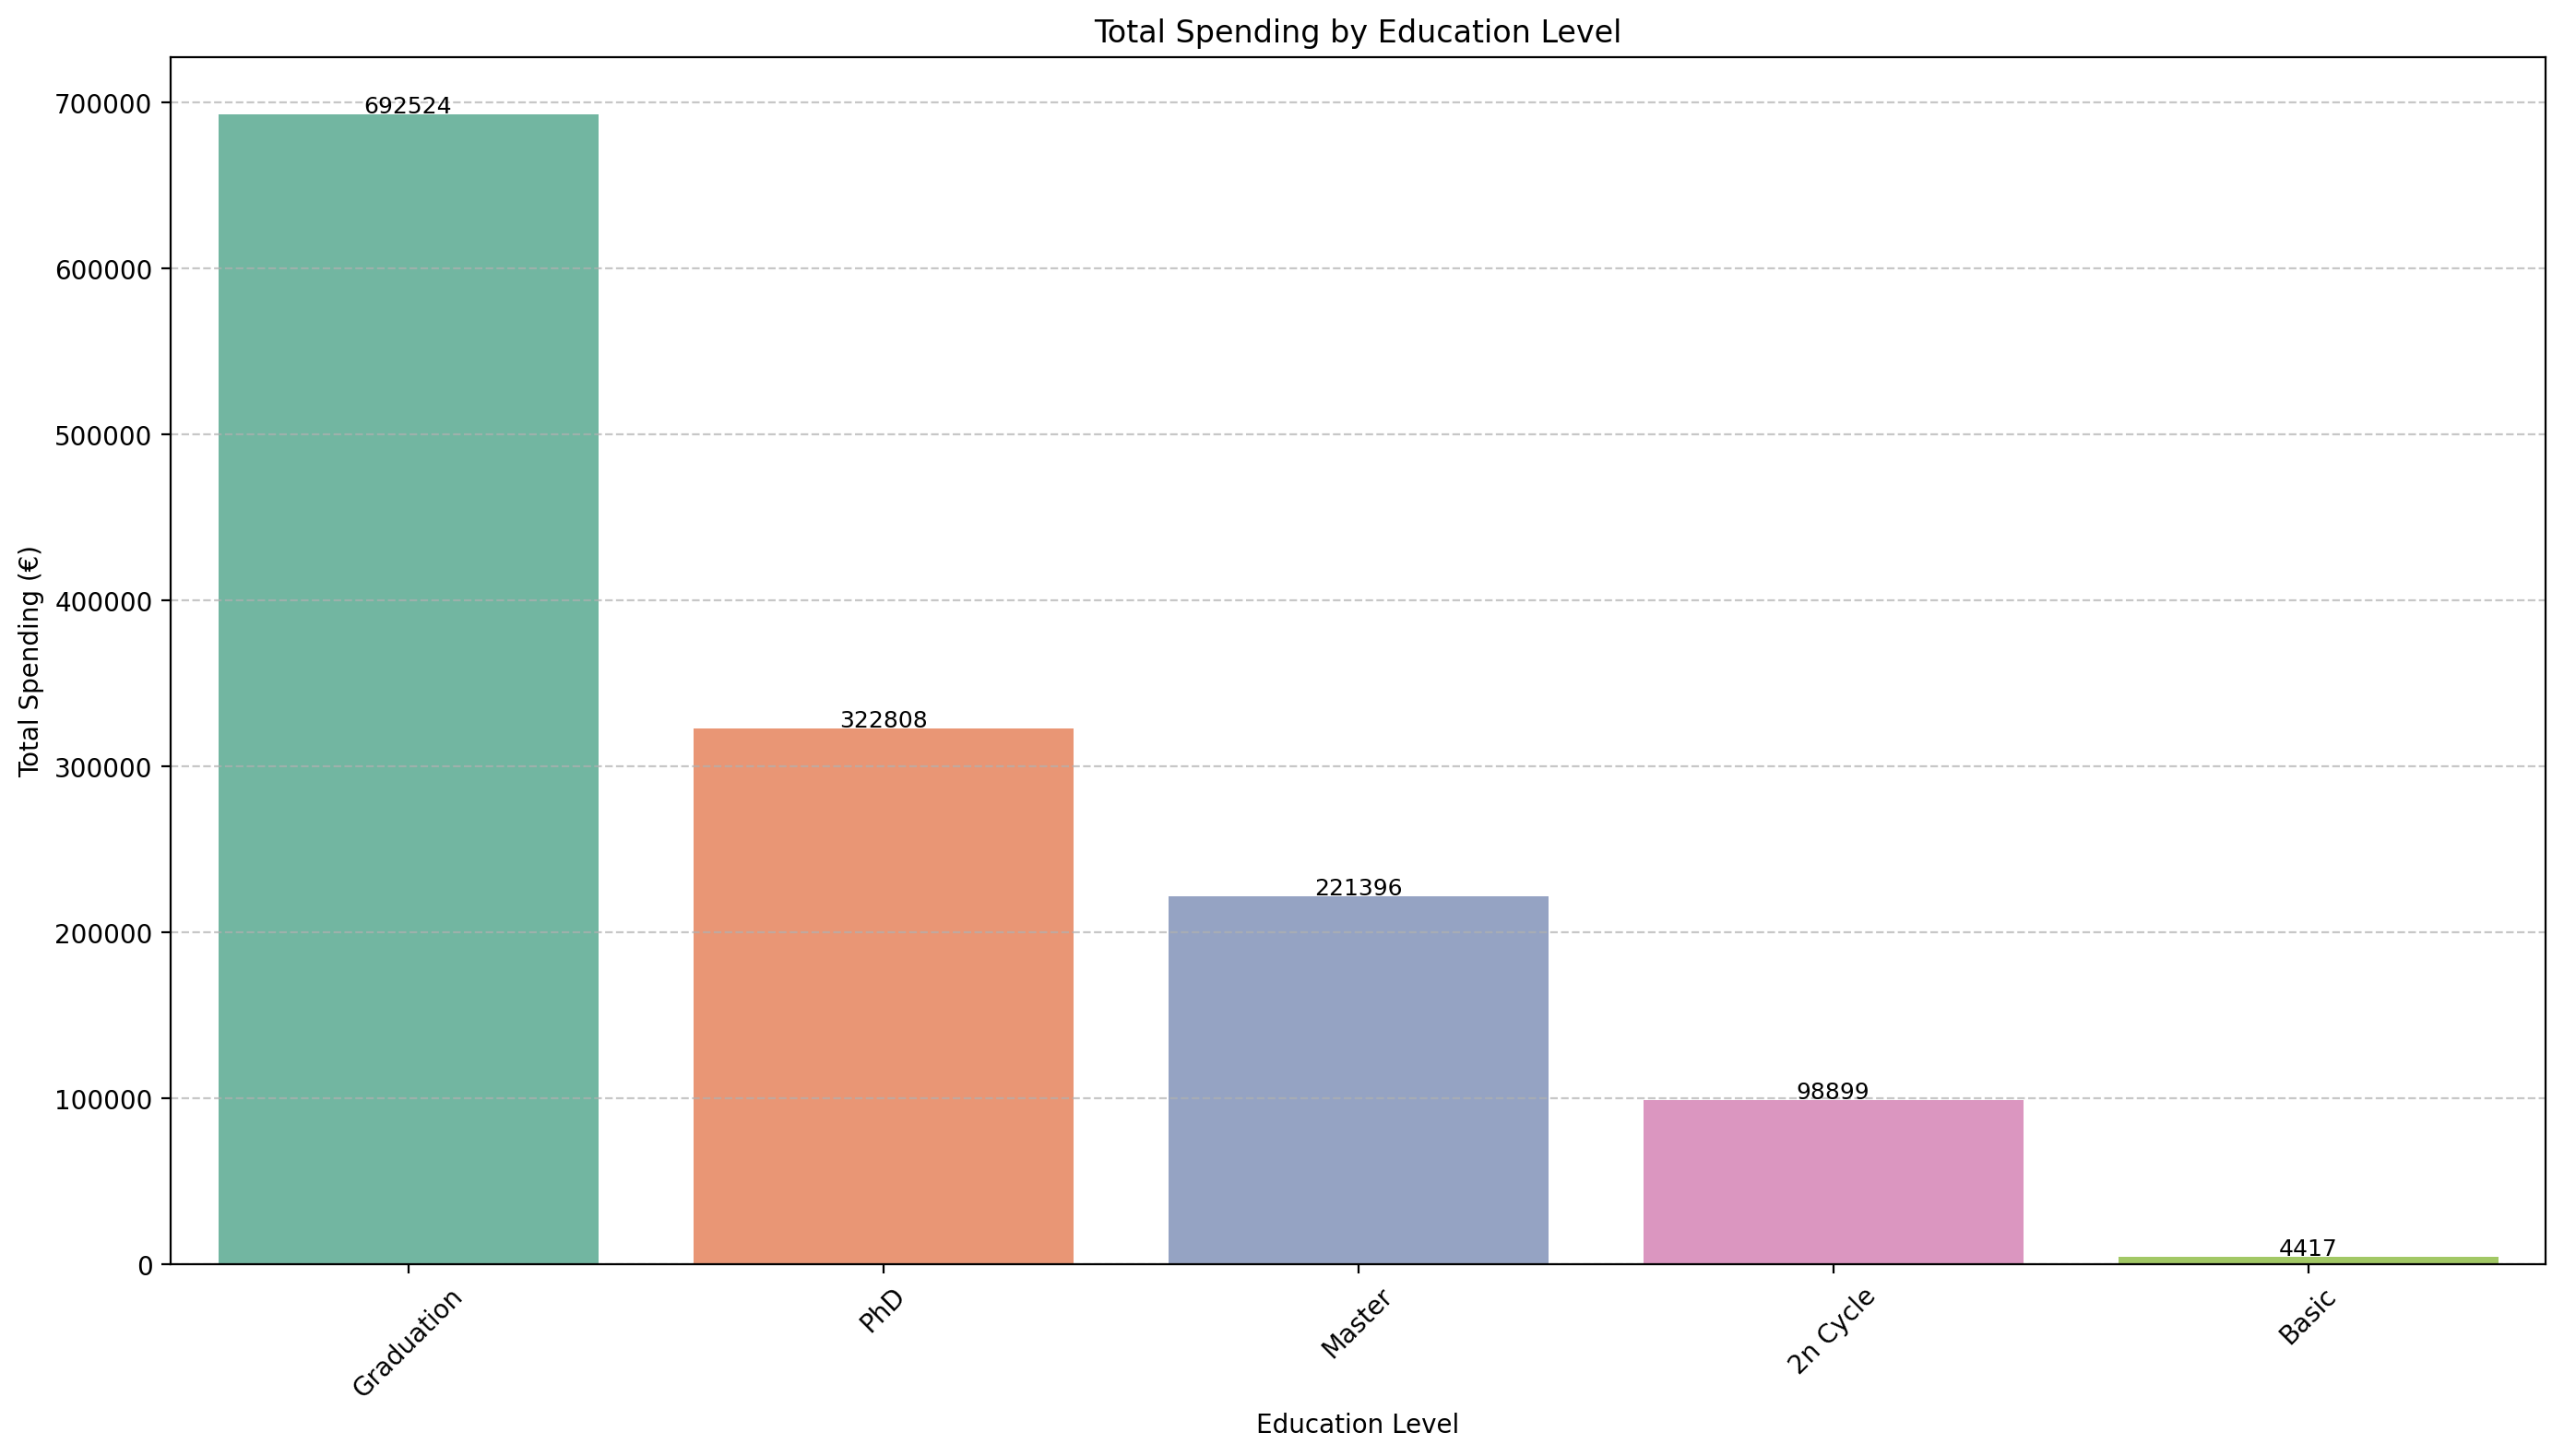

In [ ]:
# Plotting
plt.figure(figsize=(14,8), dpi=200)
sns.barplot(x=education_spending.index, y=education_spending.values, hue=education_spending.index, palette='Set2', legend=False)

# Add value labels on bars
for index, value in enumerate(education_spending.values):
    plt.text(index, value + 1000, f'{int(value)}', ha='center', fontsize=9)

plt.title('Total Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Spending (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Purchasing Channel
Understanding which channels customers use to make purchases—online, in-store, or via catalog—is essential for:

Identifying customer preferences and shopping habits

Evaluating the performance of each sales channel

Designing channel-specific marketing strategies

Exploring how channel usage may relate to customer demographics or spending behavior

This helps businesses optimize their operations, allocate resources better, and personalize user experiences.

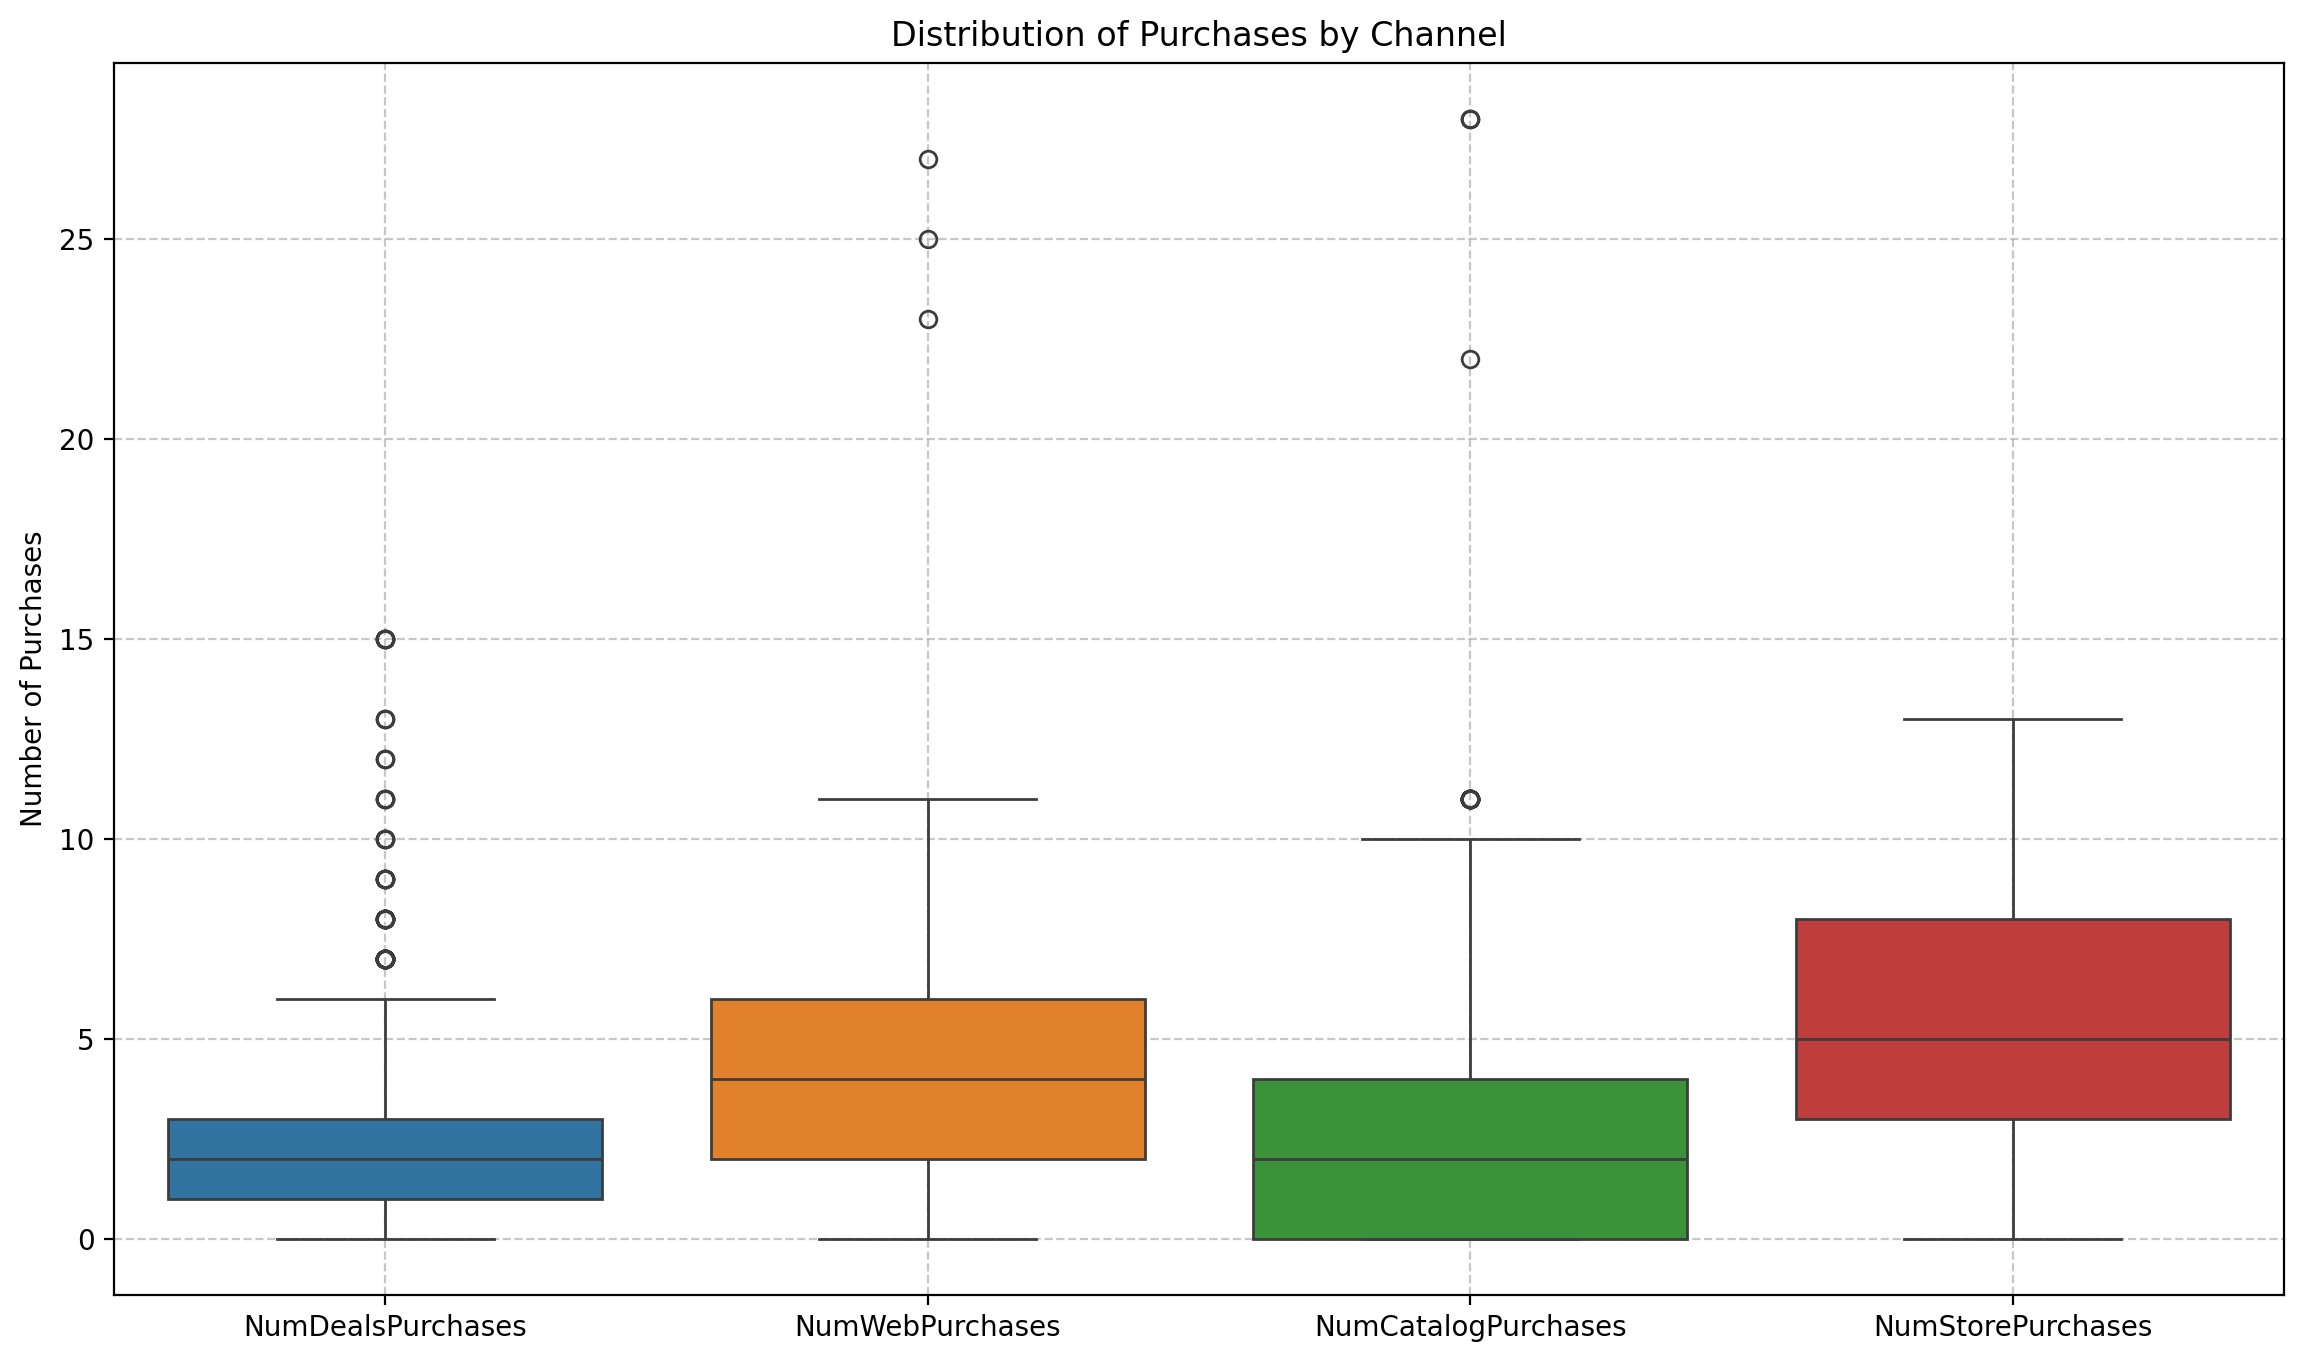

In [ ]:
# Define columns related to purchasing channels
channel_cols = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']

# Plot the distribution of purchases by channel
plt.figure(figsize=(14,8), dpi=200)
sns.boxplot(data=df_data[channel_cols])
plt.title('Distribution of Purchases by Channel')
plt.ylabel('Number of Purchases')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

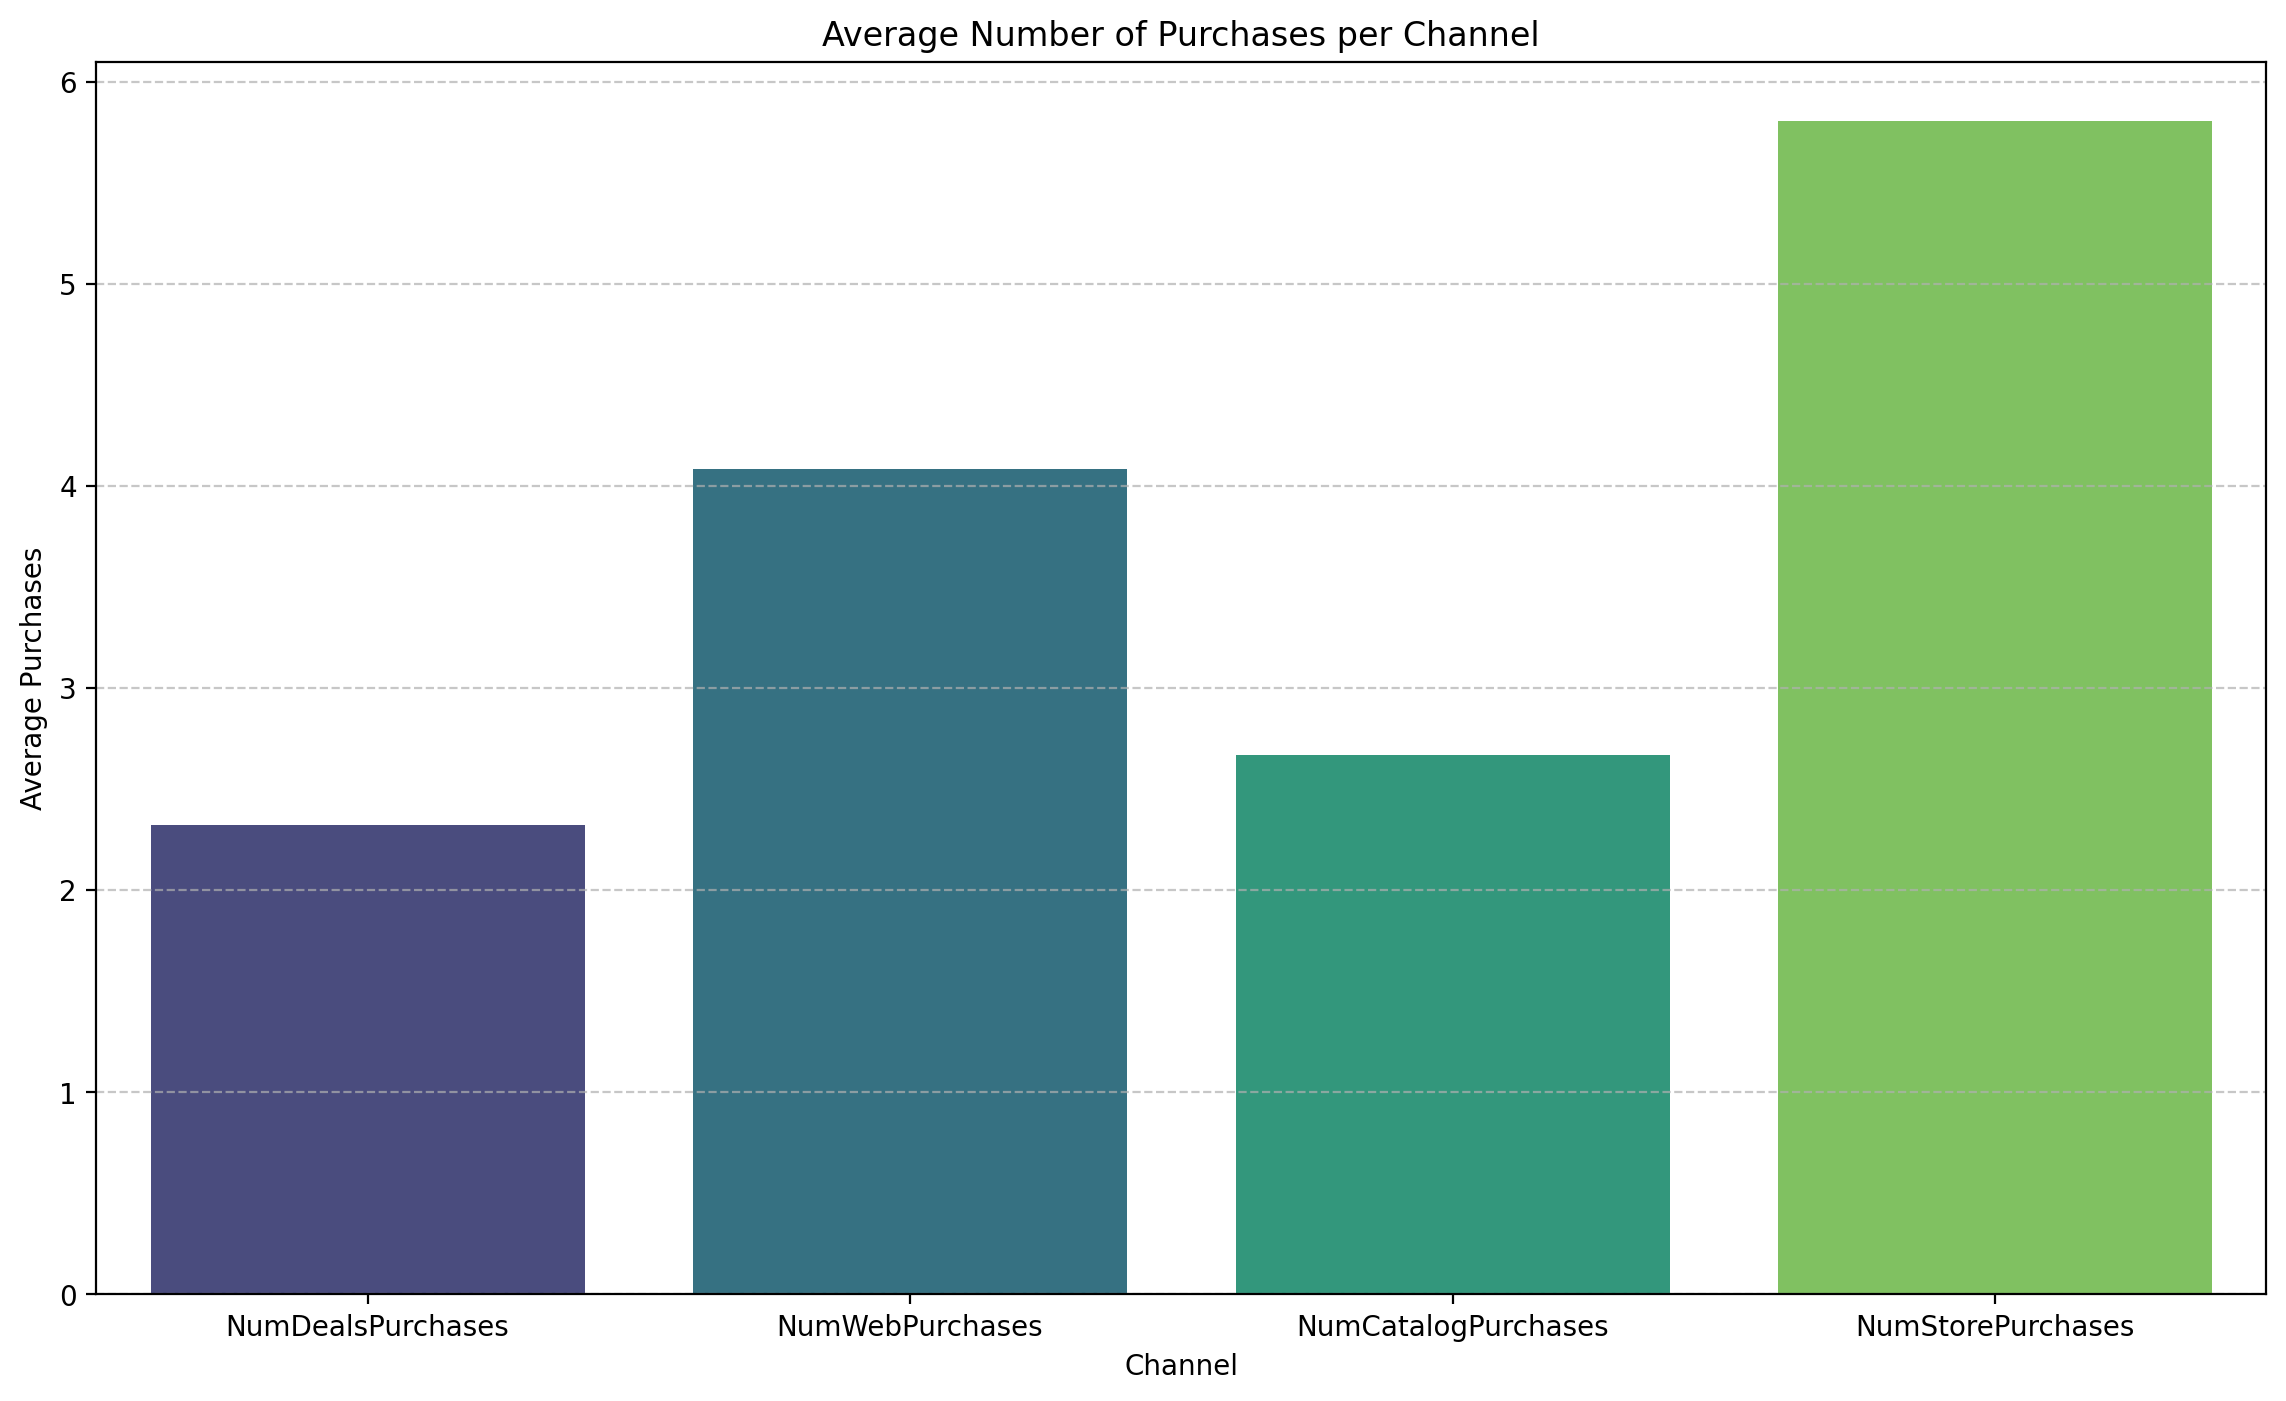

In [ ]:
# Bar chart of average purchases per channel
avg_channel = df_data[channel_cols].mean()

plt.figure(figsize=(14,8), dpi=200)
sns.barplot(x=avg_channel.index, y=avg_channel.values, hue=avg_channel.index, palette='viridis', legend=False)
plt.title('Average Number of Purchases per Channel')
plt.ylabel('Average Purchases')
plt.xlabel('Channel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Group by Age_Group and calculate the average number of purchases per type
age_purchase_behavior = df_data.groupby('Age_Group')[channel_cols].mean()
age_purchase_behavior.head()

/tmp/ipython-input-94-3631129743.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase_behavior = df_data.groupby('Age_Group')[channel_cols].mean()


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Age_Group,,,,
26-35,1.547619,3.642857,4.142857,6.190476
36-50,2.041860,3.556589,2.218605,5.289922
51-65,2.548140,4.167396,2.494530,5.725383
65+,2.334432,4.556837,3.309720,6.448105


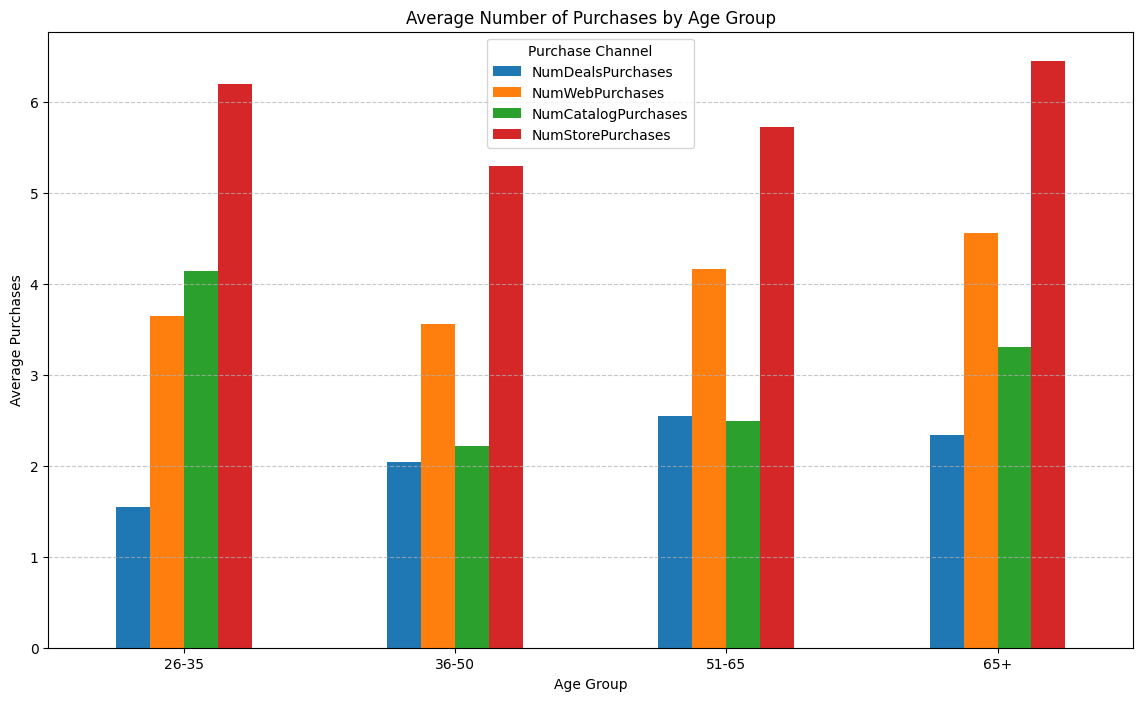

In [ ]:
age_purchase_behavior.plot(kind='bar',figsize=(14,8))
plt.title('Average Number of Purchases by Age Group')
plt.ylabel('Average Purchases')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Purchase Channel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Marketing Campaign Response
Marketing campaign response data is essential to evaluate the effectiveness of each campaign. By analyzing it, we can:

Understand which campaigns performed best in terms of customer acceptance.

Identify customer segments more likely to respond to marketing efforts.

Optimize future campaigns by focusing on strategies that work.

In [ ]:
df_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group', 'Total_Children', 'Total_Spending'],
      dtype='object')

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
# Sum total responses for each campaign
campaign_response = df_data[campaign_cols].sum().sort_values(ascending=False)
campaign_response

,0
AcceptedCmp4,164
AcceptedCmp3,163
AcceptedCmp5,160
AcceptedCmp1,141
AcceptedCmp2,30


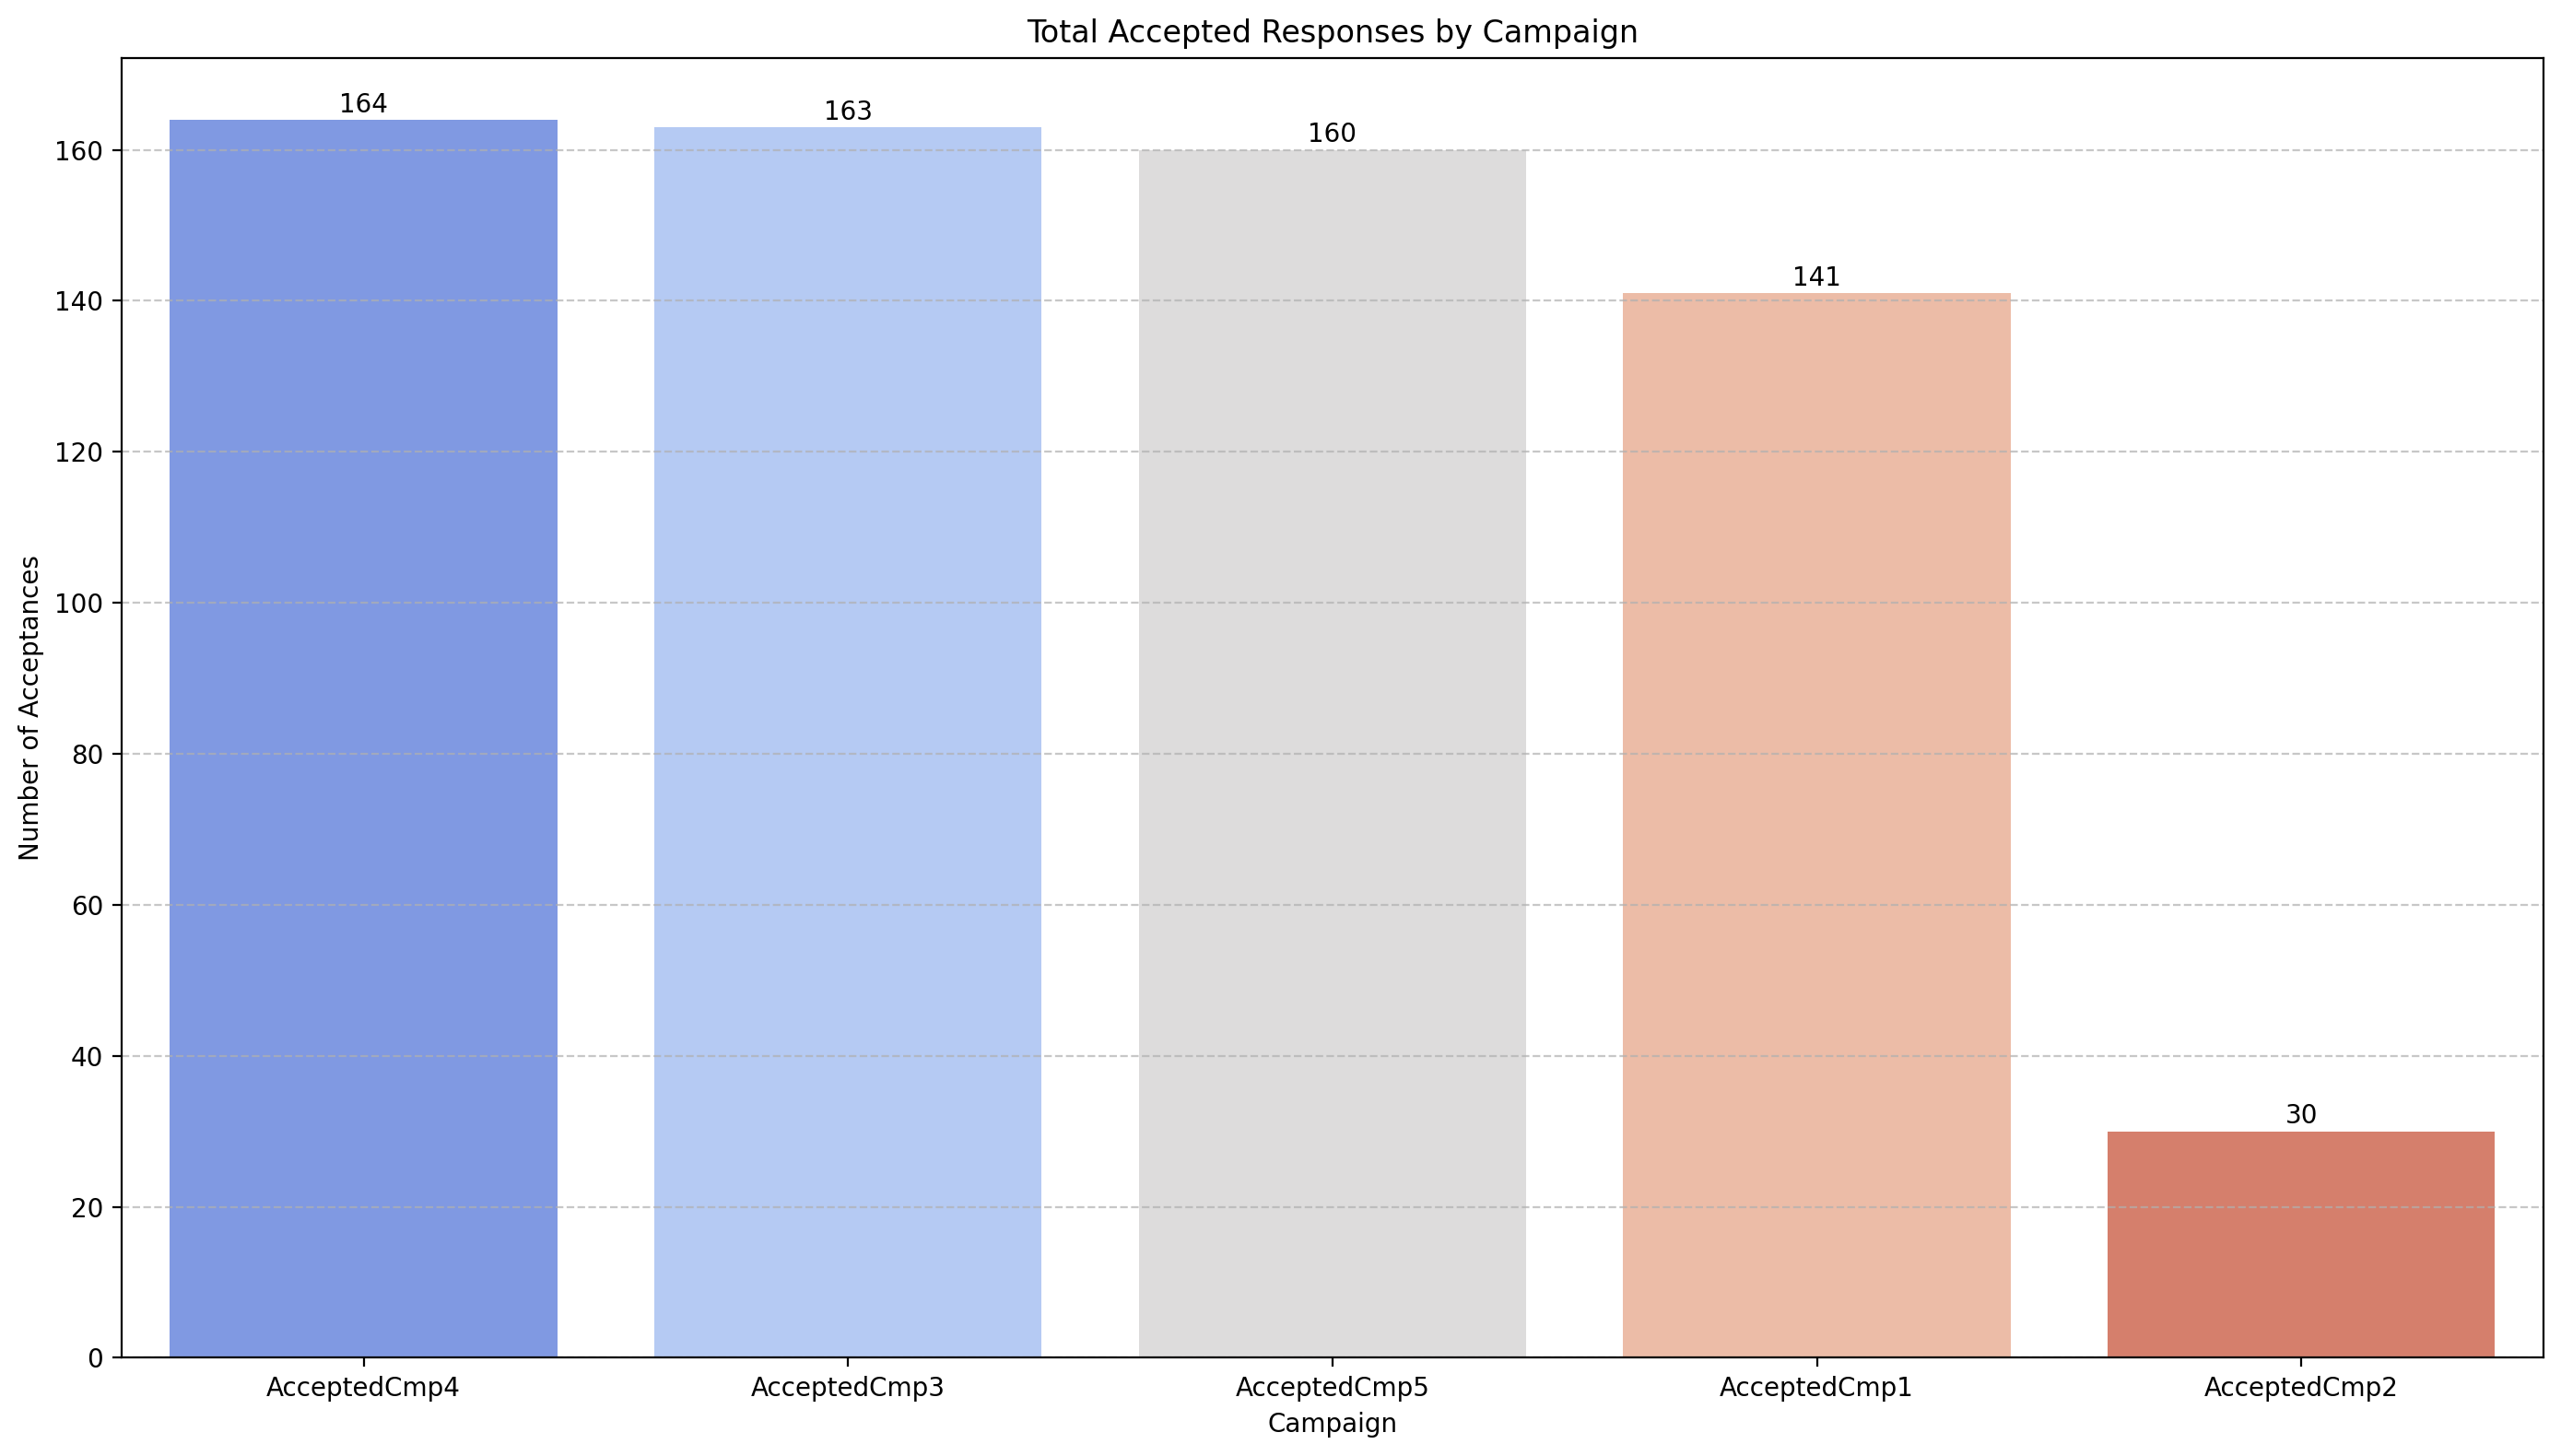

In [ ]:
# Plot
plt.figure(figsize=(14,8),dpi=200)
sns.barplot(x=campaign_response.index, y=campaign_response.values, hue=campaign_response.index, palette='coolwarm', legend=False)
for index, value in enumerate(campaign_response.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)
plt.title('Total Accepted Responses by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Number of Acceptances')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Campaign acceptance shows which age groups are more responsive to marketing efforts. Understanding this helps to:

Target campaigns better by age group

Optimize marketing budgets

Improve personalization of offers

In [ ]:
# Prepare data for plotting: group by Age_Group and sum campaign accepts
campaign_by_age = df_data.groupby('Age_Group')[campaign_cols].sum()
campaign_by_age

/tmp/ipython-input-99-2517094712.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_by_age = df_data.groupby('Age_Group')[campaign_cols].sum()


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Age_Group,,,,,
26-35,4,1,4,4,8
36-50,43,5,62,29,48
51-65,46,15,62,71,56
65+,48,9,35,60,48


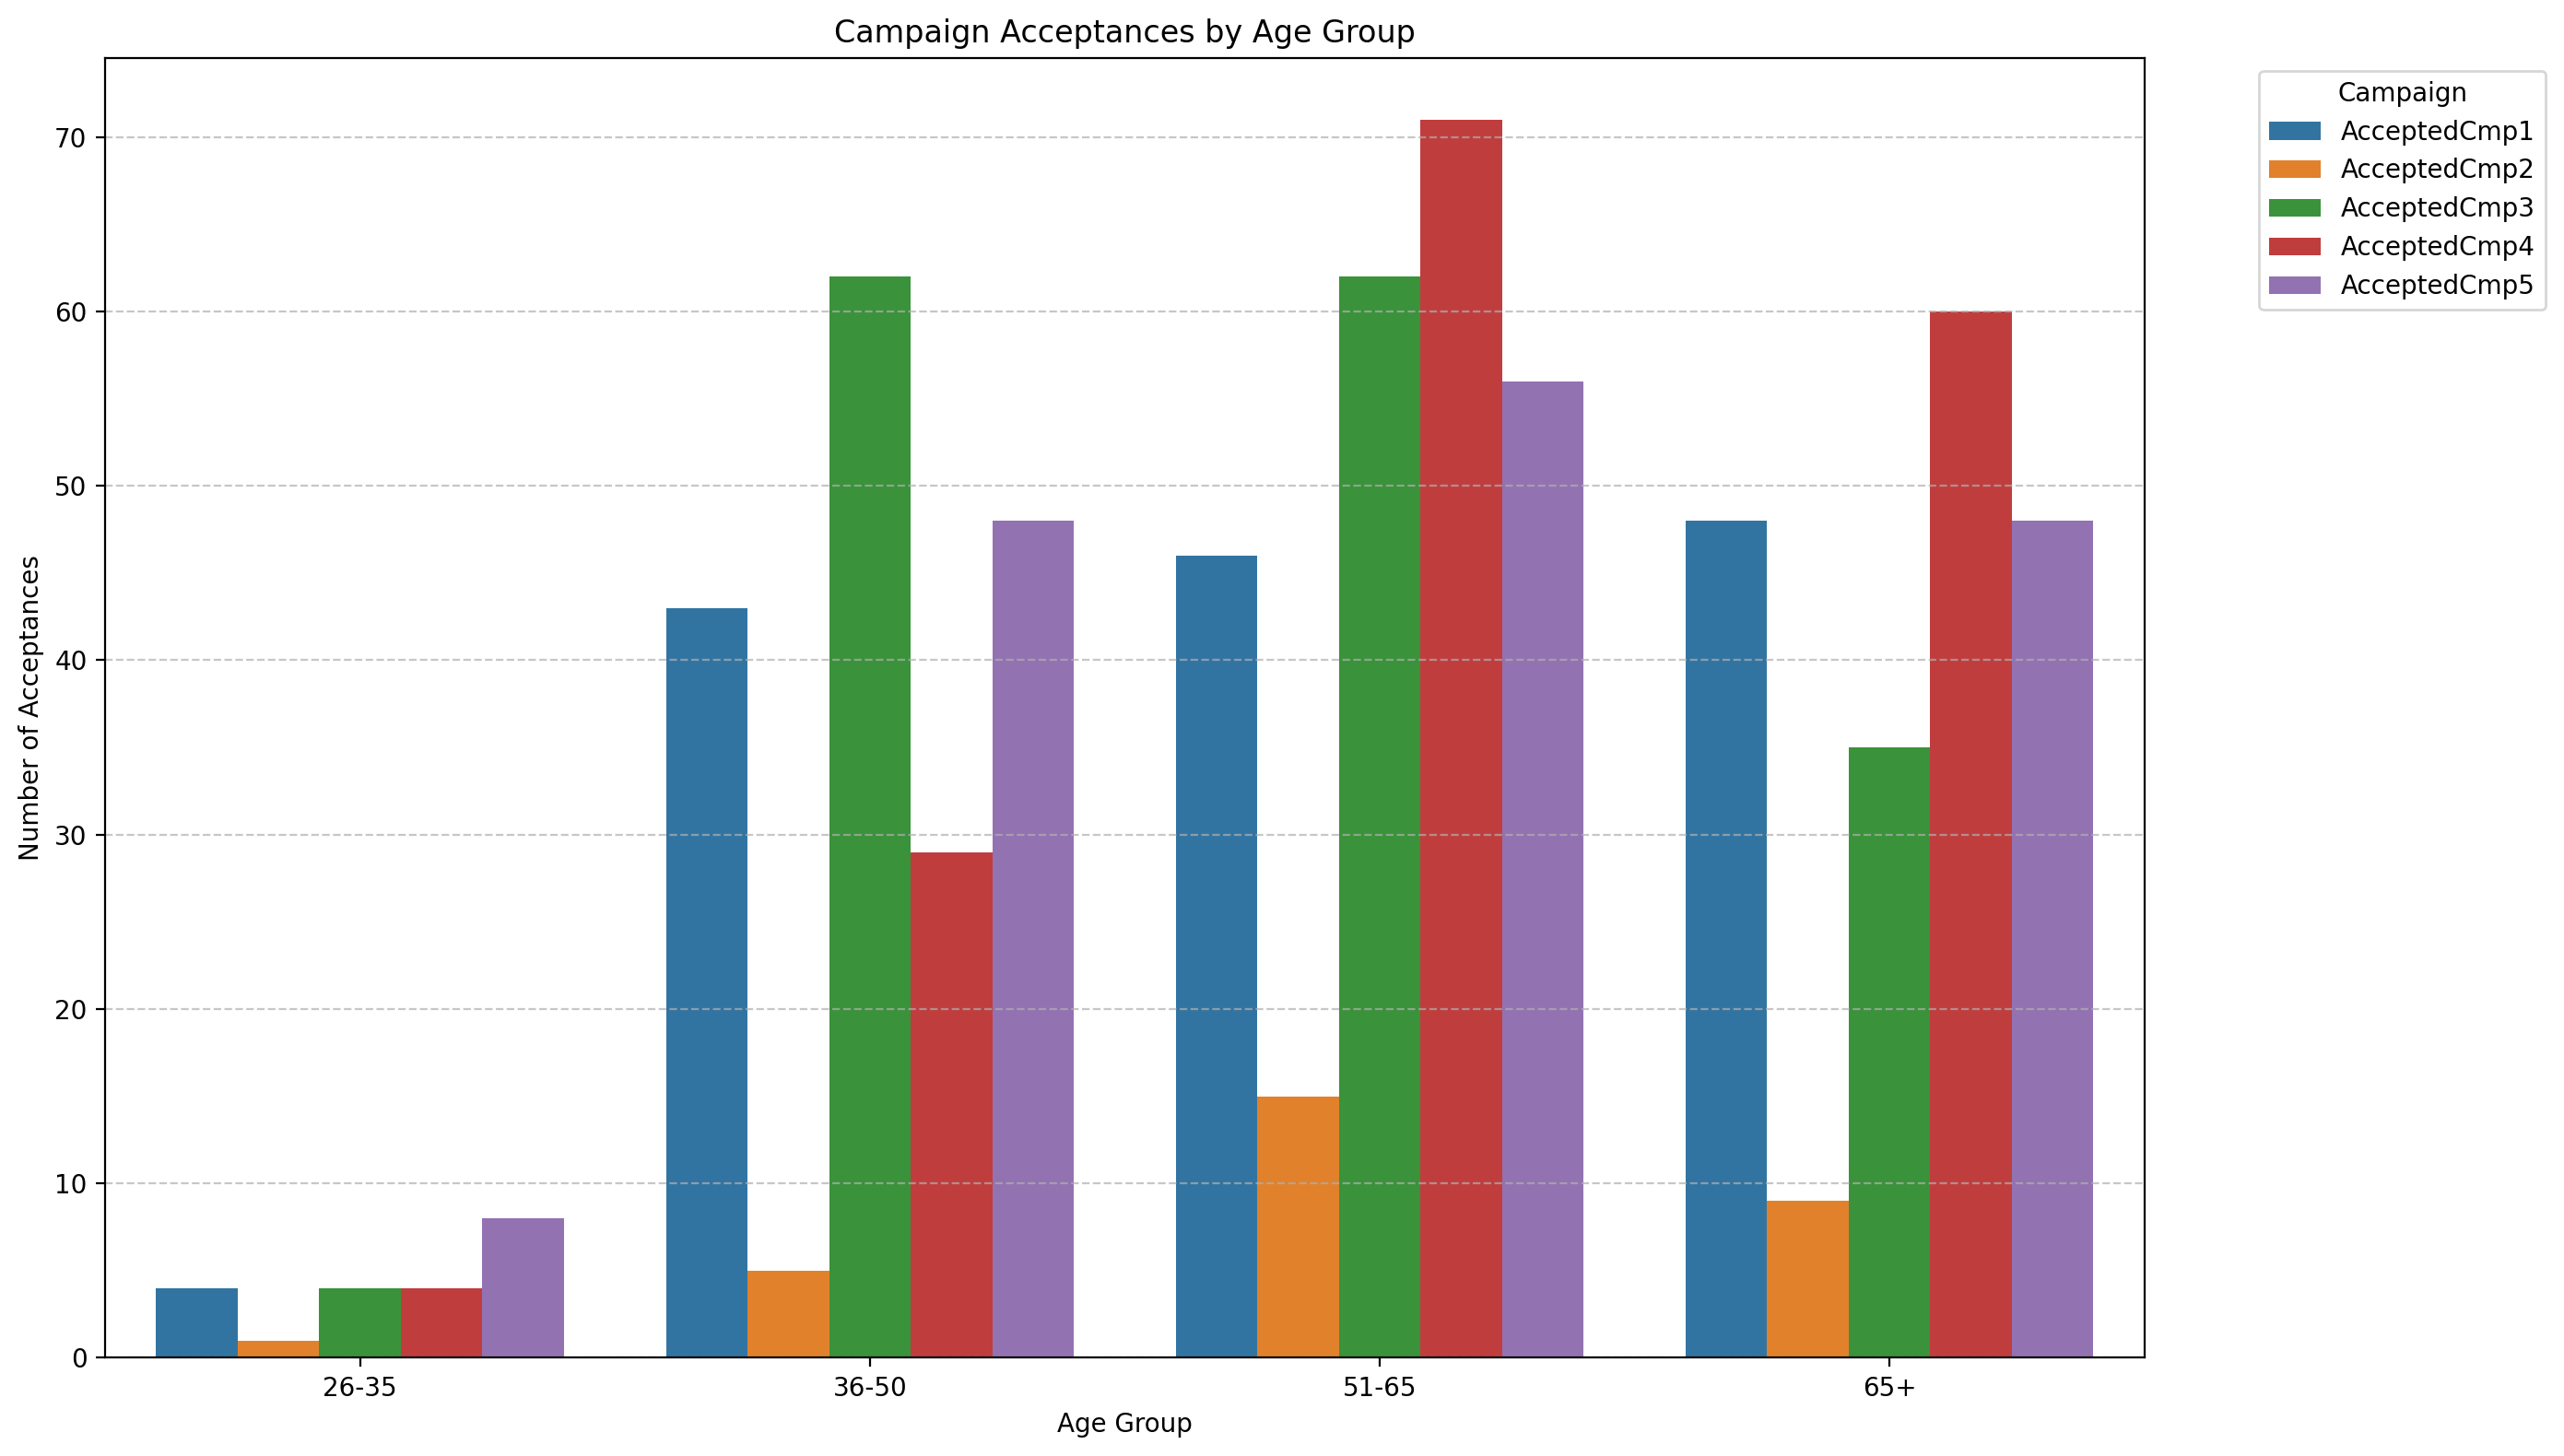

In [ ]:
# Melt the dataframe to long format for seaborn
campaign_long = campaign_by_age.melt(var_name='Campaign', value_name='Acceptances', ignore_index=False)

plt.figure(figsize=(14,8),dpi=200)
sns.barplot(data=campaign_long, x='Age_Group', y='Acceptances', hue='Campaign')

plt.title('Campaign Acceptances by Age Group')
plt.ylabel('Number of Acceptances')
plt.xlabel('Age Group')
plt.legend(title='Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## RFM Analysis (Recency, Frequency, Monetary)
Why we are doing this:
RFM analysis is a powerful technique used to segment customers based on their purchasing behavior. It allows us to prioritize and personalize marketing strategies. Here's what each component tells us:

Recency: How recently a customer made a purchase.
Recent customers are more likely to respond to promotions.

Frequency: How often a customer makes purchases.
Frequent buyers are loyal and worth nurturing.

Monetary: How much money a customer has spent.
High spenders are high-value customers.

Objective:
We will compute RFM scores for each customer, normalize them into quantiles (1–5), and classify customers into behavioral segments.

In [ ]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_Children,Total_Spending
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,68,65+,0,1617
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,71,65+,2,27
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,60,51-65,0,776
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,41,36-50,1,53
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,44,36-50,1,422


In [ ]:
# Define today's date for Recency calculation
today_date = datetime.datetime(2015,1,1)

In [ ]:
#  Calculate RFM metrics
rfm = df_data[['ID', 'Dt_Customer', 'Total_Spending']].copy()
rfm['Recency'] = (today_date - rfm['Dt_Customer']).dt.days
rfm['Frequency'] = 1
rfm['Monetary'] = rfm['Total_Spending']

rfm = rfm[['ID', 'Recency', 'Frequency', 'Monetary']]
rfm.reset_index(inplace=True)
rfm.head()

,index,ID,Recency,Frequency,Monetary
0,0,5524,849,1,1617
1,1,2174,299,1,27
2,2,4141,498,1,776
3,3,6182,325,1,53
4,4,5324,347,1,422


In [ ]:
# Assign R, F, M scores (1 to 5 based on quantiles)
# rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
# rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])
# rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])
# Becouse Frequency metric is calculated like this: 'ID':'count'
# ID is unique per row and I basically counting 1 purchase per customer but everyone has a frequency of 1.
# So i decide to drop Frequency from scoring.

In [ ]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [ ]:
# Create combined RFM segment (just R and M)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['M_Score'].astype(str)

In [ ]:
# Calculate RFM Score (just 2 components)
rfm['RFM_Score'] = rfm[['R_Score', 'M_Score']].sum(axis=1)
rfm.head()

,index,ID,Recency,Frequency,Monetary,R_Score,M_Score,RFM_Segment,RFM_Score
0,0,5524,849,1,1617,1,5,15,6
1,1,2174,299,1,27,5,1,51,6
2,2,4141,498,1,776,3,4,34,7
3,3,6182,325,1,53,5,1,51,6
4,4,5324,347,1,422,4,3,43,7


### Customer segmentation
Customer segmentation helps you target marketing efforts efficiently. By knowing who your Champions are, or which customers are at risk of churning, you can personalize campaigns and maximize ROI.

We’ll use the combined R_Score and M_Score (since Frequency is constant) and then create customer groups such as:

**Champions**: Recent and high-spending

**Potential Loyalists**: Recent but medium spending

**At Risk**: Not recent but high spending

**Need Attention**: Medium recent, low spending

**Hibernating**: Old and low spending

In [ ]:
def segment_customer(row):
    r = int(row['R_Score'])
    m = int(row['M_Score'])

    if r >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and m <= 3:
        return 'Potential Loyalists'
    elif r <= 2 and m >= 4:
        return 'At Risk'
    elif 2 <= r <= 3 and m <= 3:
        return 'Need Attention'
    else:
        return 'Hibernating'

# Apply function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)

# View segment distribution
rfm['Customer_Segment'].value_counts()

,count
Customer_Segment,
Potential Loyalists,576
Need Attention,527
At Risk,414
Hibernating,384
Champions,307


In [ ]:
rfm.head()

,index,ID,Recency,Frequency,Monetary,R_Score,M_Score,RFM_Segment,RFM_Score,Customer_Segment
0,0,5524,849,1,1617,1,5,15,6,At Risk
1,1,2174,299,1,27,5,1,51,6,Potential Loyalists
2,2,4141,498,1,776,3,4,34,7,Hibernating
3,3,6182,325,1,53,5,1,51,6,Potential Loyalists
4,4,5324,347,1,422,4,3,43,7,Potential Loyalists


In [ ]:
# Merge df_data with RFM table:
rfm = rfm.reset_index()
df_merged = df_data.merge(rfm, on='ID', how='left')

###K-Means Clustering
K-Means helps us segment customers into distinct groups based on behavior — without needing to manually define rules.
Group similar customers together based on spending, engagement, and behavior.

Identify patterns for targeted marketing (e.g., loyal customers, low spenders).

Support the business in customizing offers per cluster.

In [ ]:
# Select features for clustering (you can adjust these)
cluster_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

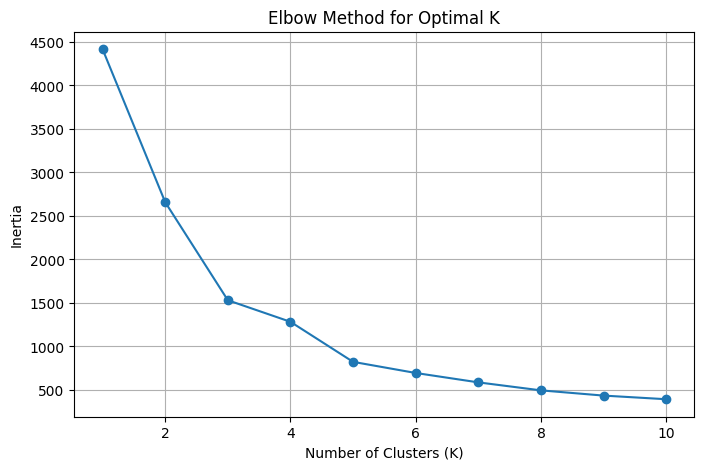

In [ ]:
# Try different values of K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
# Fit KMeans with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
# View average values per cluster
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(cluster_summary)

         Recency  Frequency  Monetary
Cluster                              
0          288.6        1.0     331.5
1          771.4        1.0     392.0
2          525.1        1.0     222.2
3          591.1        1.0    1460.5


In [ ]:
# Save the updated dataset with RFM scores and clusters
# df_merged.to_csv('marketing_campaign_segmented.csv', index=False)

# If you're using Google Colab, use this to download the file:
# from google.colab import files
# files.download('marketing_campaign_segmented.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>